# 🧪 Previsão de Diabetes com Aprendizado de Máquina

Este projeto foi desenvolvido com o objetivo de aplicar técnicas de ciência de dados para prever a ocorrência de diabetes a partir de dados clínicos. Realizei este estudo de forma independente como forma de aprofundar meus conhecimentos e explorar o potencial da ciência de dados para resolver problemas práticos e sensíveis, como os da área da saúde.

O dataset utilizado é público, e as etapas contempladas no projeto incluem:

- Análise exploratória de dados (EDA)
- Pré-processamento, normalização e imputação
- Tratamento de desbalanceamento
- Modelagem com múltiplos algoritmos
- Otimização de hiperparâmetros
- Avaliação comparativa de desempenho

> Este projeto foi construído como uma simulação real de um ciclo completo de ciência de dados.

# Fase 1: Análise Exploratória de Dados (EDA)

In [79]:
import warnings
warnings.filterwarnings('ignore')

In [80]:
import pandas as pd

In [81]:
dados = pd.read_csv('diabetes.csv')
dados.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [82]:
dados.info()
# Não há dados faltantes na base

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [83]:
dados.duplicated().sum()
# Não há duplicatas na nossa base

0

In [84]:
dados.describe().round(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0,768.0
mean,3.8,120.9,69.1,20.5,79.8,32.0,0.5,33.2,0.3
std,3.4,32.0,19.4,16.0,115.2,7.9,0.3,11.8,0.5
min,0.0,0.0,0.0,0.0,0.0,0.0,0.1,21.0,0.0
25%,1.0,99.0,62.0,0.0,0.0,27.3,0.2,24.0,0.0
50%,3.0,117.0,72.0,23.0,30.5,32.0,0.4,29.0,0.0
75%,6.0,140.2,80.0,32.0,127.2,36.6,0.6,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.1,2.4,81.0,1.0


In [85]:
dados.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [86]:
import plotly.express as px

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

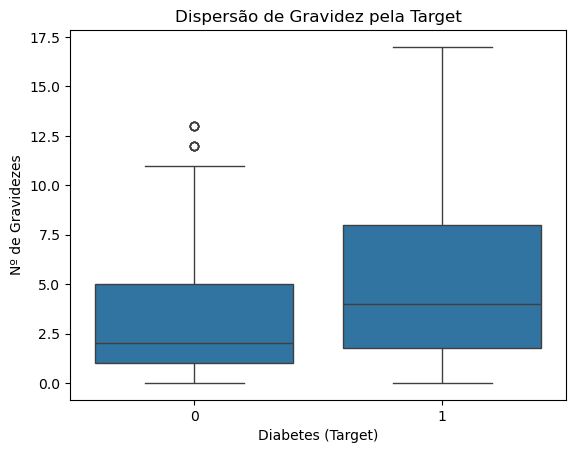

In [88]:
ax = sns.boxplot(x = dados['Outcome'], y = dados['Pregnancies'])
plt.title('Dispersão de Gravidez pela Target')
plt.xlabel('Diabetes (Target)')
plt.ylabel('Nº de Gravidezes');

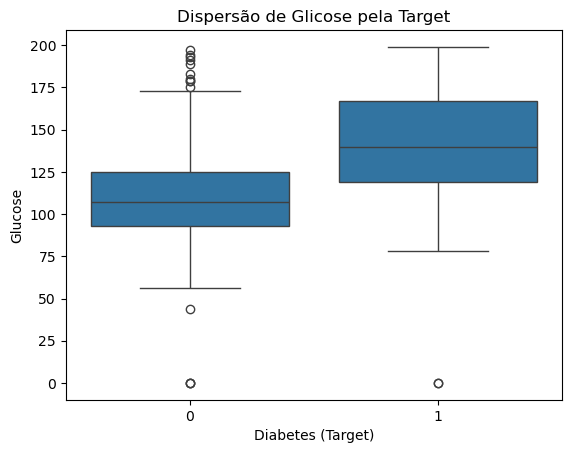

In [89]:
ax = sns.boxplot(x = dados['Outcome'], y = dados['Glucose'])
plt.title('Dispersão de Glicose pela Target')
plt.xlabel('Diabetes (Target)')
plt.ylabel('Glucose');

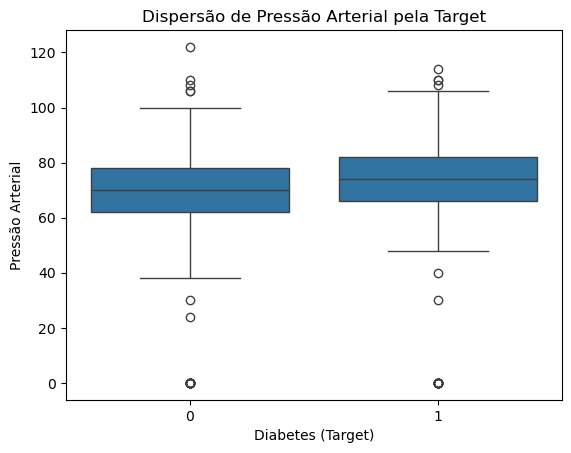

In [90]:
ax = sns.boxplot(x = dados['Outcome'], y = dados['BloodPressure'])
plt.title('Dispersão de Pressão Arterial pela Target')
plt.xlabel('Diabetes (Target)')
plt.ylabel('Pressão Arterial');

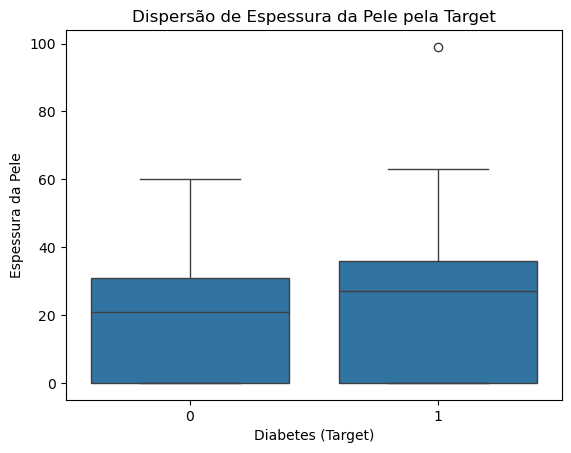

In [91]:
ax = sns.boxplot(x = dados['Outcome'], y = dados['SkinThickness'])
plt.title('Dispersão de Espessura da Pele pela Target')
plt.xlabel('Diabetes (Target)')
plt.ylabel('Espessura da Pele');

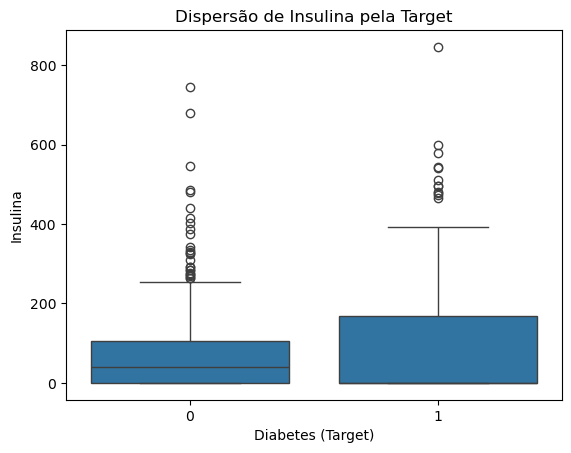

In [92]:
ax = sns.boxplot(x = dados['Outcome'], y = dados['Insulin'])
plt.title('Dispersão de Insulina pela Target')
plt.xlabel('Diabetes (Target)')
plt.ylabel('Insulina');

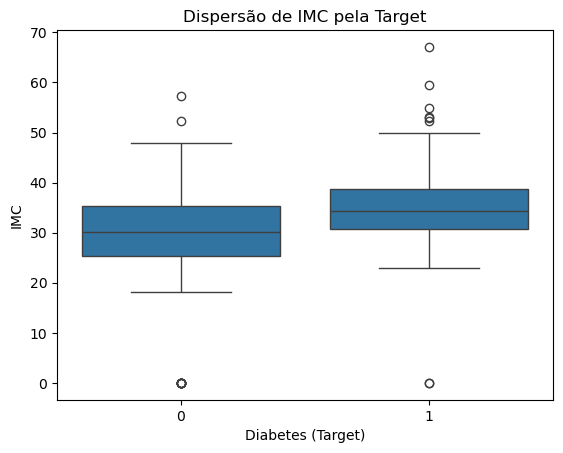

In [93]:
ax = sns.boxplot(x = dados['Outcome'], y = dados['BMI'])
plt.title('Dispersão de IMC pela Target')
plt.xlabel('Diabetes (Target)')
plt.ylabel('IMC');

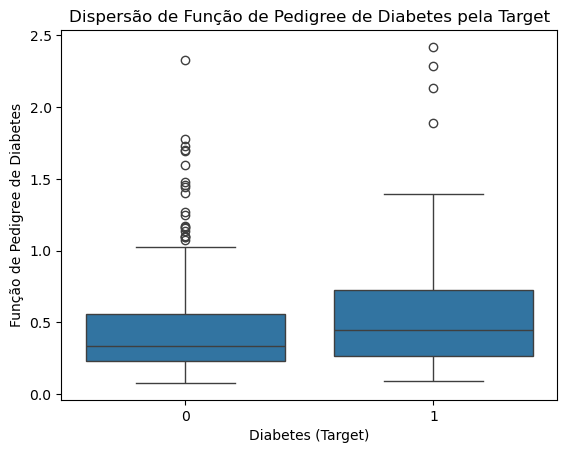

In [94]:
ax = sns.boxplot(x = dados['Outcome'], y = dados['DiabetesPedigreeFunction'])
plt.title('Dispersão de Função de Pedigree de Diabetes pela Target')
plt.xlabel('Diabetes (Target)')
plt.ylabel('Função de Pedigree de Diabetes');

In [95]:
dados.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

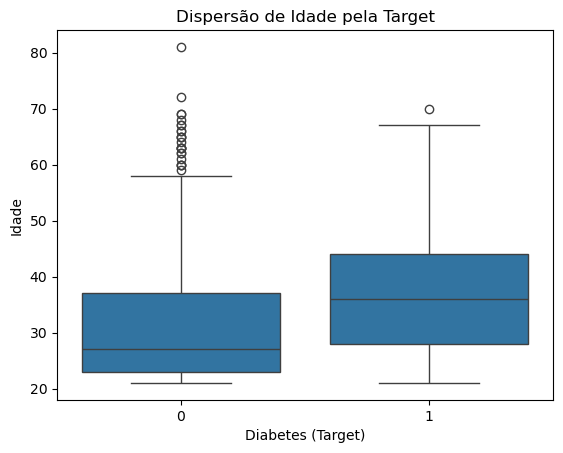

In [96]:
ax = sns.boxplot(x = dados['Outcome'], y = dados['Age'])
plt.title('Dispersão de Idade pela Target')
plt.xlabel('Diabetes (Target)')
plt.ylabel('Idade');

<Axes: >

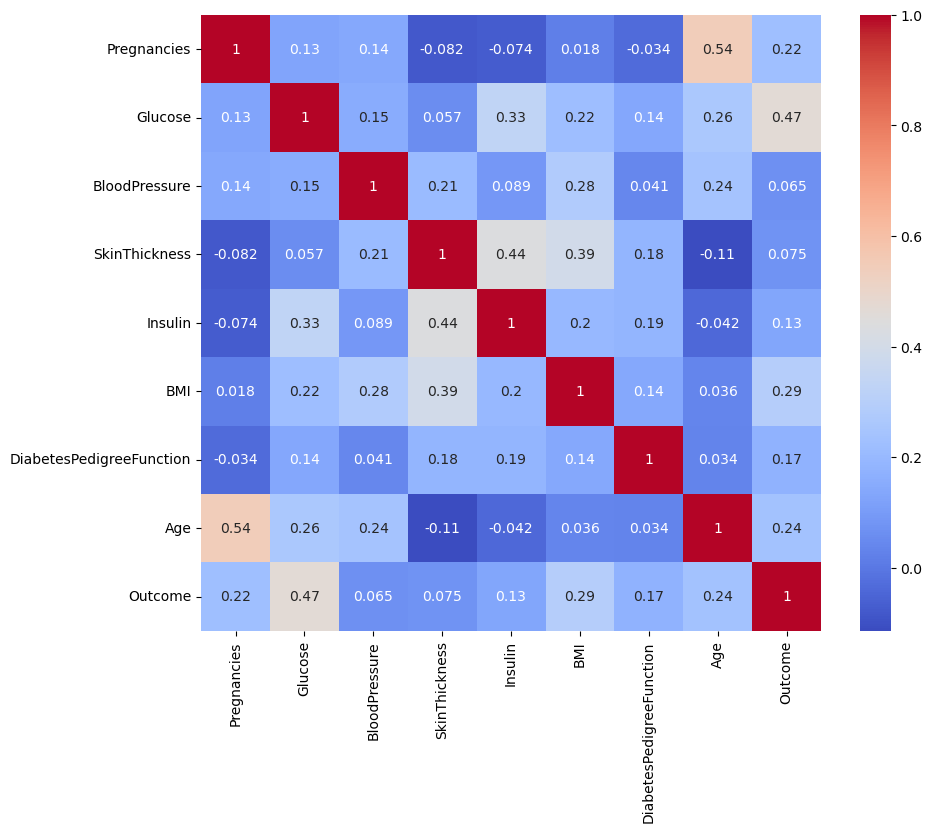

In [97]:
plt.figure(figsize=(10, 8))
sns.heatmap(dados.corr(numeric_only=True), annot=True, cmap='coolwarm')

In [98]:
a = {
    1:'Sim',
    0:'Não'
}
dados['OutcomeStr'] = dados['Outcome'].map(a)
dados.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,OutcomeStr
0,6,148,72,35,0,33.6,0.627,50,1,Sim
1,1,85,66,29,0,26.6,0.351,31,0,Não
2,8,183,64,0,0,23.3,0.672,32,1,Sim
3,1,89,66,23,94,28.1,0.167,21,0,Não
4,0,137,40,35,168,43.1,2.288,33,1,Sim


In [99]:
px.histogram(dados, x = 'OutcomeStr', text_auto = True)
#Percebemos um desbalanceamento na nossa base

In [100]:
dados['Outcome'].value_counts(normalize = True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

## 🔍 Considerações da Análise Exploratória

Durante a análise exploratória, identifiquei alguns pontos importantes:

- A base está desbalanceada: apenas cerca de 35% das amostras possuem diagnóstico positivo para diabetes.
- Algumas variáveis possuem valores zero que não fazem sentido clinicamente (ex: glicose = 0).
- Há correlações esperadas, como a relação entre IMC e glicose, além da idade.

Essas observações direcionaram as etapas seguintes de tratamento e modelagem.


# Fase 2: Pré-processamento para Modelagem

### Tratamento de Zeros e Outliers

In [101]:
colunas_invalidas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [102]:
import numpy as np

dados[colunas_invalidas] = dados[colunas_invalidas].replace(0, np.nan)

In [103]:
for coluna in colunas_invalidas:
    print(f"{coluna}: {(dados[coluna] == 0).sum()} valores zero")

Glucose: 0 valores zero
BloodPressure: 0 valores zero
SkinThickness: 0 valores zero
Insulin: 0 valores zero
BMI: 0 valores zero


In [104]:
dados.describe().round(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.0,763.0,733.0,541.0,394.0,757.0,768.0,768.0,768.0
mean,3.8,121.7,72.4,29.2,155.5,32.5,0.5,33.2,0.3
std,3.4,30.5,12.4,10.5,118.8,6.9,0.3,11.8,0.5
min,0.0,44.0,24.0,7.0,14.0,18.2,0.1,21.0,0.0
25%,1.0,99.0,64.0,22.0,76.2,27.5,0.2,24.0,0.0
50%,3.0,117.0,72.0,29.0,125.0,32.3,0.4,29.0,0.0
75%,6.0,141.0,80.0,36.0,190.0,36.6,0.6,41.0,1.0
max,17.0,199.0,122.0,99.0,846.0,67.1,2.4,81.0,1.0


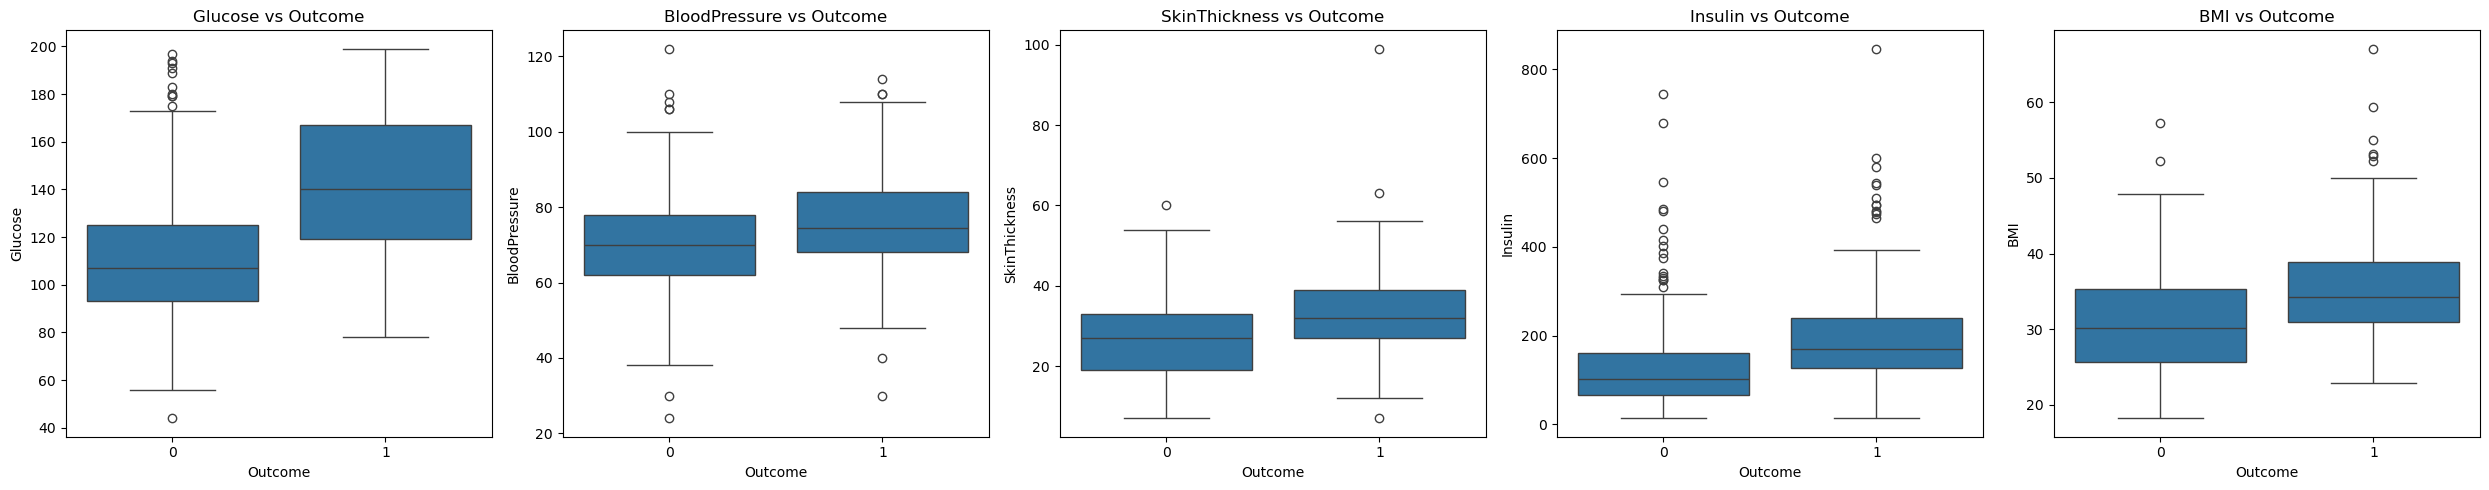

In [105]:
target_col = 'Outcome'
feature_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

num_features = len(feature_cols)
fig, axes = plt.subplots(1, num_features, figsize=(5 * num_features, 5))

for i, feature in enumerate(feature_cols):
    sns.boxplot(data=dados, x=target_col, y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} vs {target_col}')

plt.tight_layout()
plt.show()

In [106]:
colunas_outliers = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [107]:
q1 = dados[colunas_outliers].quantile(0.25)
q3 = dados[colunas_outliers].quantile(0.75)

iqr = q3 - q1

In [108]:
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

In [109]:
dados_2 = dados.copy()

In [110]:
for coluna in colunas_outliers:
    Q1 = dados_2[coluna].quantile(0.25)
    Q3 = dados_2[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    dados_2[coluna] = np.clip(dados_2[coluna], limite_inferior, limite_superior)

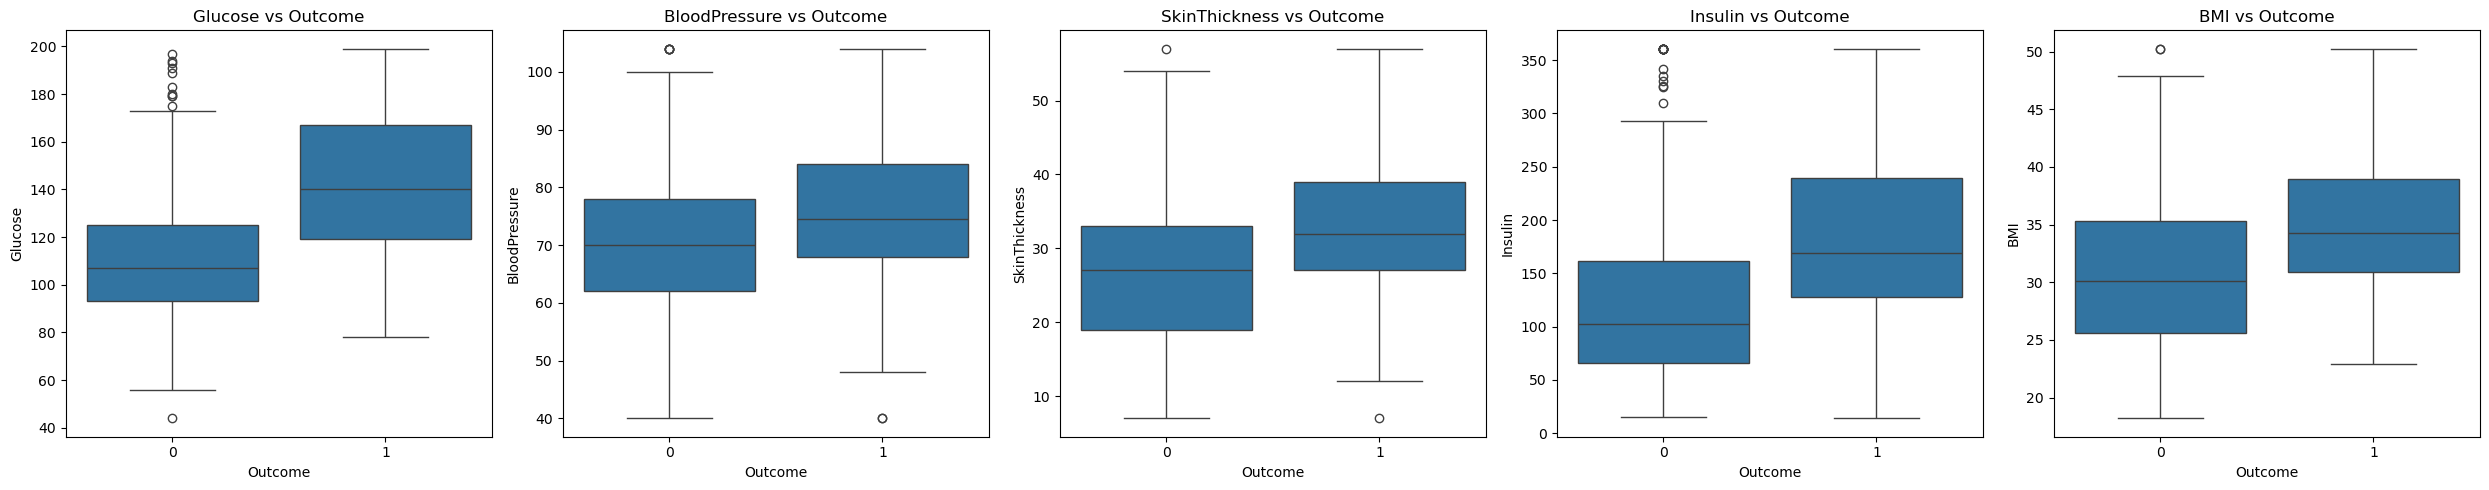

In [111]:
num_features = len(feature_cols)
fig, axes = plt.subplots(1, num_features, figsize=(5 * num_features, 5))

for i, feature in enumerate(feature_cols):
    sns.boxplot(data=dados_2, x=target_col, y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} vs {target_col}')

plt.tight_layout()
plt.show()

In [112]:
dados = dados_2.copy()

### Split seguido de normalização de X de treino e teste

In [113]:
x = dados.drop(columns = ['Outcome','OutcomeStr'])
y = dados['Outcome']

In [114]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 12, stratify = y)

In [115]:
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()
x_train_normalized = normalize.fit_transform(x_train)

In [116]:
x_test_normalized = normalize.transform(x_test)

In [144]:
x_normalized = normalize.transform(x)

In [117]:
pd.DataFrame(x_train_normalized)

,0,1,2,3,4,5,6,7
0,0.000000,0.258065,0.656250,0.48,0.320231,0.624025,0.066183,0.039216
1,0.705882,0.690323,0.468750,0.66,0.741435,0.736349,0.283518,0.333333
2,0.058824,0.612903,0.093750,0.24,0.199062,0.327613,0.245944,0.019608
3,0.117647,0.496774,0.468750,0.50,0.233682,0.652106,0.345004,0.039216
4,0.117647,0.477419,0.625000,NaN,NaN,0.770671,0.262596,0.000000
...,...,...,...,...,...,...,...,...
532,0.000000,0.374194,0.546875,0.32,NaN,NaN,0.210931,0.000000
533,0.411765,0.483871,NaN,NaN,NaN,0.218409,0.055935,0.313725
534,0.294118,0.664516,0.593750,NaN,NaN,0.483619,0.059778,0.862745
535,0.647059,0.606452,0.531250,0.38,0.375045,0.558502,0.204526,0.568627


### Imputação de X de Treino e Teste

In [118]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)

In [145]:
x_imputed = imputer.transform(x_normalized)

In [119]:
x_train_imputed = imputer.fit_transform(x_train_normalized)

In [120]:
x_test_imputed = imputer.transform(x_test_normalized)

In [121]:
x_train_imputed = pd.DataFrame(x_train_imputed, columns = x.columns)
x_test_imputed = pd.DataFrame(x_test_imputed, columns = x.columns)
x_train_imputed.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.000000,0.258065,0.65625,0.480,0.320231,0.624025,0.066183,0.039216
1,0.705882,0.690323,0.46875,0.660,0.741435,0.736349,0.283518,0.333333
2,0.058824,0.612903,0.09375,0.240,0.199062,0.327613,0.245944,0.019608
3,0.117647,0.496774,0.46875,0.500,0.233682,0.652106,0.345004,0.039216
4,0.117647,0.477419,0.62500,0.564,0.407934,0.770671,0.262596,0.000000


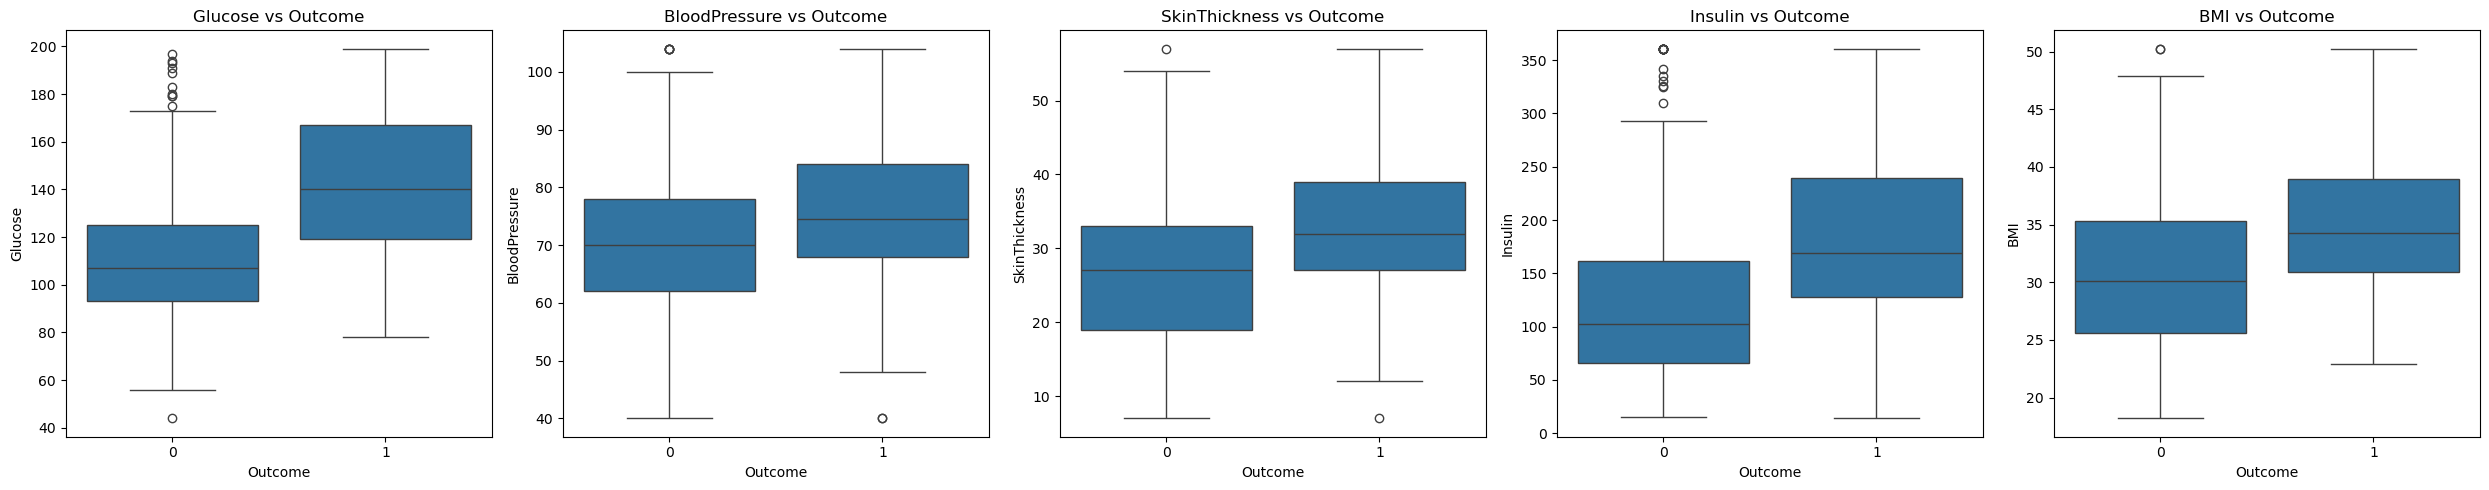

In [122]:
num_features = len(feature_cols)
fig, axes = plt.subplots(1, num_features, figsize=(5 * num_features, 5))

for i, feature in enumerate(feature_cols):
    sns.boxplot(data=dados, x=target_col, y=feature, ax=axes[i])
    axes[i].set_title(f'{feature} vs {target_col}')

plt.tight_layout()
plt.show()

## 🧼 Tratamentos Realizados

Para garantir a qualidade dos dados antes da modelagem:

- Valores zeros incorretos foram substituídos por `NaN`
- Foi feita imputação com `KNNImputer`
- Aplicado tratamento de outliers com base no IQR
- Dados foram normalizados com `MinMaxScaler`
- Separação treino/teste com estratificação

Esses cuidados são fundamentais para evitar viés, overfitting e garantir uma avaliação justa dos modelos.

# Fase 3: Modelagem

## ⚙️ Escolha de Modelos

Antes de iniciar a modelagem, foram selecionados algoritmos levando em conta:  
- **Tipo de problema:** Classificação binária  
- **Natureza dos dados:** Dataset pequeno, com variáveis clínicas, sensível e desbalanceado  
- **Critérios de escolha:** Interpretabilidade, robustez e adequação ao contexto clínico  

### Modelos Selecionados
1. **Regressão Logística**  
   Simples, interpretável e amplamente utilizada na área da saúde.  
   Permite análise direta da influência de cada variável (via coeficientes).  
   Serve como excelente baseline para comparação.  

2. **Árvore de Decisão (Decision Tree)**  
   Fácil de interpretar e visualizar.  
   Útil como modelo final e como base para ensembles.  

3. **Random Forest**  
   Robusto a outliers, overfitting e colinearidade.  
   Indicado para dados tabulares com ruído moderado.  
   Suporta balanceamento de classes via `class_weight='balanced'`.  

4. **KNN (K-Nearest Neighbors)**  
   Simples e intuitivo, baseado em distância.  
   Atua como contraponto a modelos lineares ou baseados em árvore.  
   Requer normalização (já tratada no pipeline).  

5. **Voting e Stacking Classifiers**  
   Combinam diferentes modelos para aumentar robustez e desempenho.  
   Aproveitam pontos fortes de algoritmos distintos.  

### Modelos Não Utilizados no Momento
- **SVM (Support Vector Machines)**  
  Alta sensibilidade à normalização e tuning.  
  Baixa interpretabilidade.  
  Custo computacional relativamente alto.  

- **Naive Bayes**  
  Assume independência entre variáveis, o que não se aplica bem a dados clínicos.  
  Desempenho esperado inferior à regressão logística.  

- **Redes Neurais / Deep Learning**  
  Dataset pequeno (768 amostras) não justifica redes profundas.  
  Pouco interpretável e alto risco de overfitting.  

### Próximos Passos no Desenvolvimento
Embora este projeto priorize interpretabilidade e robustez no contexto clínico, está prevista para breve a inclusão de:

- **Modelos de Gradient Boosting** (XGBoost, LightGBM, CatBoost)  
  Para explorar ganhos de performance em dados tabulares, mantendo cuidado com overfitting e interpretabilidade.

- **Explicabilidade de Modelos** (SHAP, LIME)  
  Para fornecer insights claros sobre o impacto de cada variável na previsão, aumentando a transparência para profissionais de saúde.  

Essas adições permitirão comparar resultados com o pipeline atual e avaliar o trade-off entre acurácia e explicabilidade.  


### Dummy Classifier

In [123]:
from sklearn.dummy import DummyClassifier

In [124]:
dummy = DummyClassifier()

dummy.fit(x_train_imputed, y_train)

DummyClassifier()

In [125]:
print('A acurária de teste do modelo dummy foi de {0:.1f}%'.format(dummy.score(x_test_imputed, y_test)*100))
# É esperado que os demais modelos ultrapassem a métrica do Dummy

A acurária de teste do modelo dummy foi de 64.9%


### Regressão Logística

#### Treinamento e Avaliação Inicial

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
logistic_regression = LogisticRegression()

logistic_regression.fit(x_train_imputed, y_train)

LogisticRegression()

In [128]:
print('A acurácia de teste da Regressão Logística é de {0:.1f}%'.format(logistic_regression.score(x_test_imputed, y_test)*100))

A acurácia de teste da Regressão Logística é de 78.8%


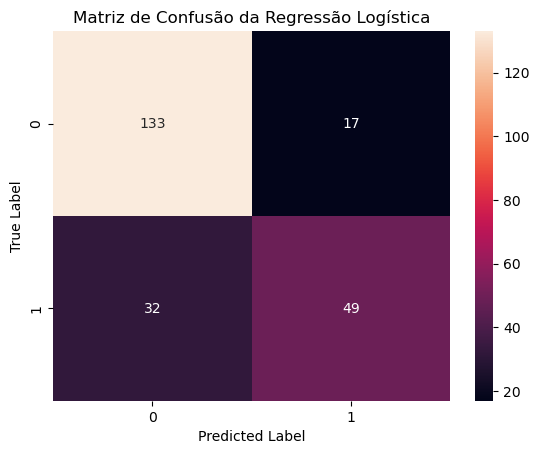

In [129]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

y_pred = logistic_regression.predict(x_test_imputed)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.title('Matriz de Confusão da Regressão Logística')
plt.xlabel('Predicted Label')
plt.ylabel('True Label');

In [130]:
from sklearn.metrics import classification_report

print('Classification Report:\n',classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.84       150
           1       0.74      0.60      0.67        81

    accuracy                           0.79       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.78      0.79      0.78       231



AUC Roc Curve: 87.06%, discriminação excelente


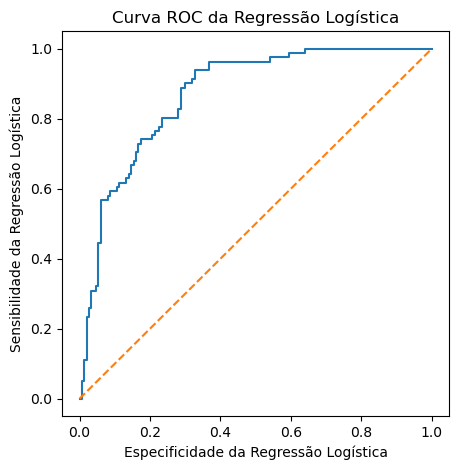

In [131]:
prob = logistic_regression.predict_proba(x_test_imputed)[:,1]

tfp, tvp, limite = roc_curve(y_test, prob)
print('AUC Roc Curve: {0:.2f}%, discriminação excelente'.format(roc_auc_score(y_test, prob)*100))
plt.subplots(1, figsize = (5,5))
plt.title('Curva ROC da Regressão Logística')
plt.plot(tfp, tvp)
plt.plot([0,1],[0,1], linestyle = '--')
plt.ylabel('Sensibilidade da Regressão Logística')
plt.xlabel('Especificidade da Regressão Logística')
plt.show()

In [132]:
from sklearn.metrics import PrecisionRecallDisplay

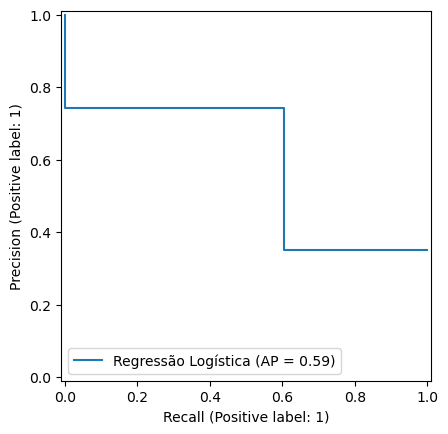

In [133]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred, name = 'Regressão Logística');
# Avarage Precision = AP

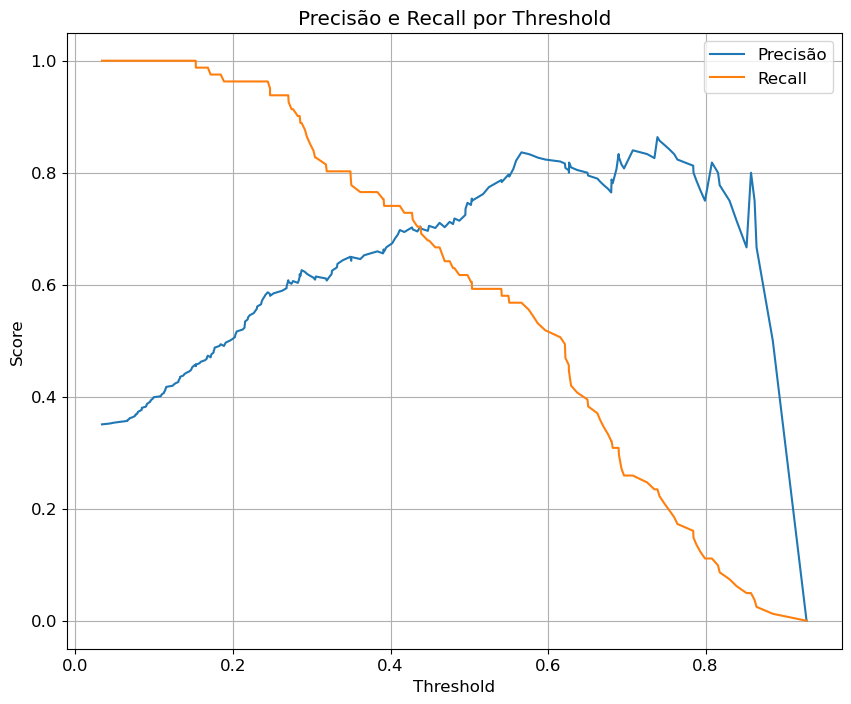

In [365]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds_pr = precision_recall_curve(y_test, prob)

plt.plot(thresholds_pr, precision[:-1], label="Precisão")
plt.plot(thresholds_pr, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precisão e Recall por Threshold")
plt.legend()
plt.grid()
plt.show()

#### Validação Cruzada com Pipeline

In [134]:
from sklearn.model_selection import cross_validate

In [141]:
from imblearn.pipeline import Pipeline as blearnpipe
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

In [142]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [146]:
# Usando oversampling SMOTE

modelo = LogisticRegression()
pipeline = blearnpipe([
        ('oversample', SMOTE()),
        ('logistic_regression', modelo)
    ])
cv_results = cross_validate(pipeline, x_imputed, y, cv = skf, scoring = ['accuracy', 'precision', 'f1', 'recall'])

In [147]:
def metrics_report(cv):
    for i in ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']:
        mean = cv[i].mean()
        deviation = cv[i].std()
        print('Intervalo de confiança {}: [{:.5f}, {:.5f}]'.format(i, (mean - 2*deviation), (mean + 2*deviation)))

In [148]:
metrics_report(cv_results)

Intervalo de confiança test_accuracy: [0.66805, 0.83962]
Intervalo de confiança test_precision: [0.49532, 0.77435]
Intervalo de confiança test_recall: [0.67723, 0.77029]
Intervalo de confiança test_f1: [0.59160, 0.75697]


In [149]:
# Usando undersampling NearMiss

from imblearn.under_sampling import NearMiss

modelo = LogisticRegression()
pipeline = blearnpipe([
        ('undersampling', NearMiss(version = 3)),
        ('logistic_regression', modelo)
    ])
cv_results = cross_validate(pipeline, x_imputed, y, cv = skf, scoring = ['accuracy', 'precision', 'f1', 'recall'])

In [150]:
metrics_report(cv_results)

Intervalo de confiança test_accuracy: [0.67321, 0.83703]
Intervalo de confiança test_precision: [0.49533, 0.82296]
Intervalo de confiança test_recall: [0.57676, 0.72932]
Intervalo de confiança test_f1: [0.57378, 0.73092]


#### Otimização

In [151]:
from sklearn.model_selection import StratifiedKFold

In [152]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 12)

In [153]:
from skopt import BayesSearchCV
from skopt.space import Categorical, Integer, Real

In [267]:
pipe = blearnpipe([
    ('oversample', SMOTE()),
    ('clf', LogisticRegression(max_iter=300, random_state=42))
])

In [268]:
search_space_lr = [
    {
        'clf__solver': Categorical(['lbfgs']),
        'clf__penalty': Categorical(['l2']),
        'clf__C': Real(1e-3, 0.5, prior='log-uniform')
    },
    {
        'clf__solver': Categorical(['liblinear']),
        'clf__penalty': Categorical(['l1']),
        'clf__C': Real(1e-3, 0.3, prior='log-uniform')
    },
    {
        'clf__solver': Categorical(['saga']),
        'clf__penalty': Categorical(['elasticnet']),
        'clf__C': Real(1e-3, 0.5, prior='log-uniform'),
        'clf__l1_ratio': Real(0.3, 0.7)
    }
]

In [269]:
bayes_lr = BayesSearchCV(
    estimator = pipe,
    search_spaces = search_space_lr,
    n_iter = 50,
    scoring = 'f1',
    cv = skf,
    n_jobs = -1,
    verbose = 0
)

In [270]:
bayes_lr.fit(x_train_imputed, y_train)

BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12, shuffle=True),
              estimator=Pipeline(steps=[('oversample', SMOTE()),
                                        ('clf',
                                         LogisticRegression(max_iter=300,
                                                            random_state=42))]),
              n_jobs=-1, scoring='f1',
              search_spaces=[{'clf__C': Real(low=0.001, high=0.5, prior='log-uniform', transform='normalize'),
                              'clf__penalty': Categorical(categories=('l2',), prior=N...
                              'clf__penalty': Categorical(categories=('l1',), prior=None),
                              'clf__solver': Categorical(categories=('liblinear',), prior=None)},
                             {'clf__C': Real(low=0.001, high=0.5, prior='log-uniform', transform='normalize'),
                              'clf__l1_ratio': Real(low=0.3, high=0.7, prior='uniform', transform='normalize'),
                              'clf__penalty': Categorical(categories=('elasticnet',), prior=None),
                              'clf__solver': Categorical(categories=('saga',), prior=None)}])

In [337]:
lr_otimizada = bayes_lr.best_estimator_

In [341]:
modelo_lr = lr_otimizada.named_steps['clf']

In [343]:
coeficientes = modelo_lr.coef_.ravel()
features_sobreviventes = x_train_imputed.columns[coeficientes != 0]
print(features_sobreviventes)

Index(['Pregnancies', 'Glucose', 'BMI', 'Age'], dtype='object')


In [272]:
lr_otimizada.fit(x_train_imputed, y_train)

Pipeline(steps=[('oversample', SMOTE()),
                ('clf',
                 LogisticRegression(C=0.22734440463497477, max_iter=300,
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [274]:
y_pred = lr_otimizada.predict(x_test_imputed)

In [276]:
lr_otimizada.score(x_train_imputed, y_train)

0.7318435754189944

In [277]:
lr_otimizada.score(x_test_imputed, y_test)

0.7532467532467533

In [278]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80       150
           1       0.62      0.75      0.68        81

    accuracy                           0.75       231
   macro avg       0.74      0.75      0.74       231
weighted avg       0.77      0.75      0.76       231



<Axes: >

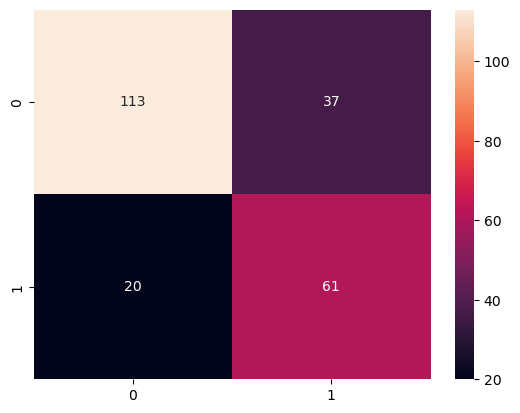

In [279]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g')

In [280]:
print(classification_report(y_test, y_pred_threshold))

              precision    recall  f1-score   support

           0       0.95      0.62      0.75       150
           1       0.57      0.94      0.71        81

    accuracy                           0.73       231
   macro avg       0.76      0.78      0.73       231
weighted avg       0.82      0.73      0.74       231



In [357]:
y_proba = lr_otimizada.predict_proba(x_test_imputed)[:,1]

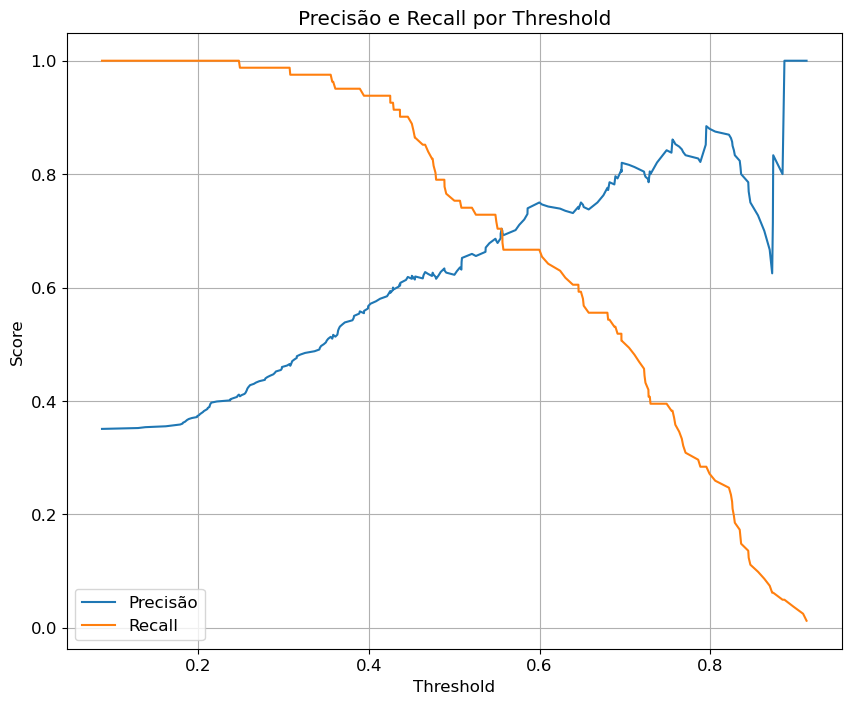

In [373]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba)

plt.plot(thresholds_pr, precision[:-1], label="Precisão")
plt.plot(thresholds_pr, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precisão e Recall por Threshold")
plt.legend()
plt.grid();

In [382]:
y_pred_threshold = (y_proba >= 0.42).astype(int)
print('Classification Report\n', classification_report(y_test, y_pred_threshold))

Classification Report
               precision    recall  f1-score   support

           0       0.95      0.64      0.76       150
           1       0.58      0.94      0.72        81

    accuracy                           0.74       231
   macro avg       0.77      0.79      0.74       231
weighted avg       0.82      0.74      0.75       231



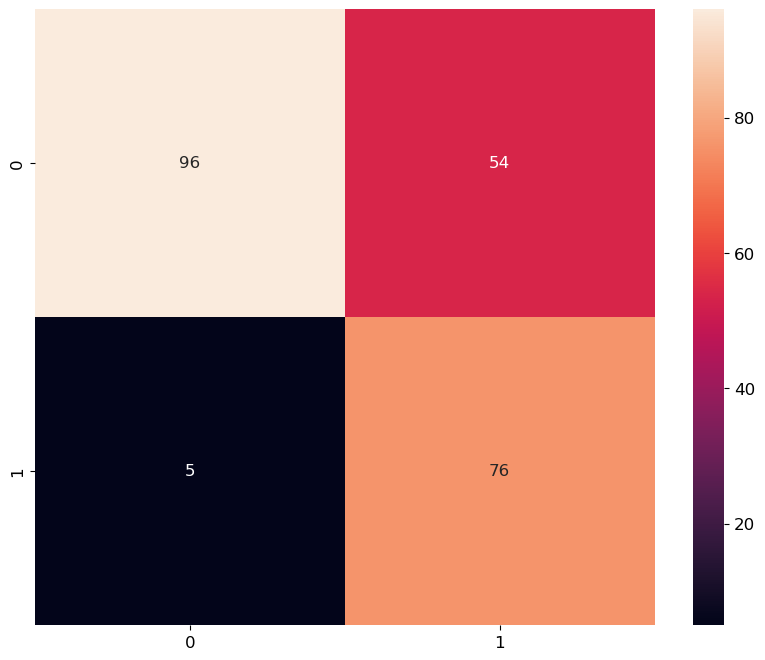

In [383]:
cm = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(cm, annot = True, fmt = 'g');

Roc Curve: 86.58%, discriminação excelente


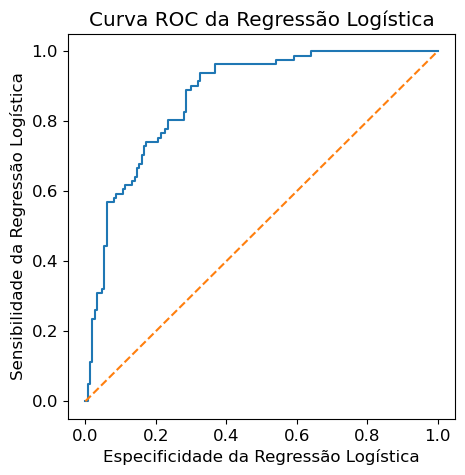

In [384]:
prob_lr_otimizada = lr_otimizada.predict_proba(x_test_imputed)[:,1]

tfp_lr_otimizada, tvp_lr_otimizada, limite_lr_otimizada = roc_curve(y_test, prob_lr_otimizada)
print('Roc Curve: {0:.2f}%, discriminação excelente'.format(roc_auc_score(y_test, prob_lr_otimizada)*100))
plt.subplots(1, figsize = (5,5))
plt.title('Curva ROC da Regressão Logística')
plt.plot(tfp, tvp)
plt.plot([0,1],[0,1], linestyle = '--')
plt.ylabel('Sensibilidade da Regressão Logística')
plt.xlabel('Especificidade da Regressão Logística')
plt.show()

### KNN

#### Treinamento e Avaliação Inicial

In [170]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [171]:
knn.fit(x_train_imputed, y_train)

KNeighborsClassifier()

In [172]:
print('A acurácia de teste do KNN é de {0:.2f}%'.format(knn.score(x_test_imputed, y_test)*100))

A acurácia de teste do KNN é de 74.03%


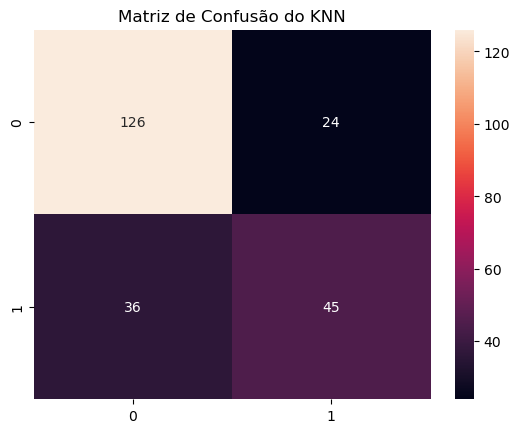

In [173]:
y_pred = knn.predict(x_test_imputed)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.title('Matriz de Confusão do KNN');

In [174]:
print('Classification Report KNN:\n',classification_report(y_test, y_pred))

Classification Report KNN:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       150
           1       0.65      0.56      0.60        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



AUC Roc Curve: 80.31%, discriminação aceitável


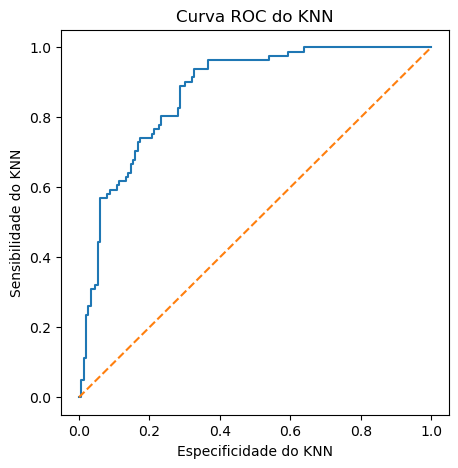

In [175]:
prob_knn = knn.predict_proba(x_test_imputed)[:,1]

tfp_knn, tvp_knn, limite_knn = roc_curve(y_test, prob_knn)
print('AUC Roc Curve: {0:.2f}%, discriminação aceitável'.format(roc_auc_score(y_test, prob_knn)*100))
plt.subplots(1, figsize = (5,5))
plt.title('Curva ROC do KNN')
plt.plot(tfp, tvp)
plt.plot([0,1],[0,1], linestyle = '--')
plt.ylabel('Sensibilidade do KNN')
plt.xlabel('Especificidade do KNN')
plt.show()

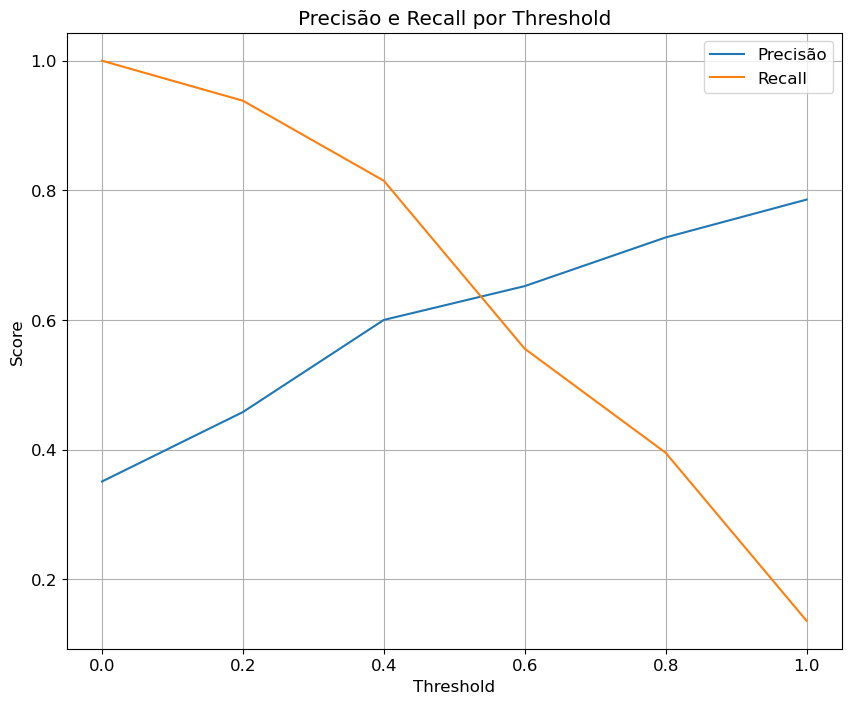

In [385]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, prob_knn)

plt.plot(thresholds_pr, precision[:-1], label="Precisão")
plt.plot(thresholds_pr, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precisão e Recall por Threshold")
plt.legend()
plt.grid();

#### Validação Cruzada

In [176]:
cv = cross_validate(knn, x_imputed, y, cv = skf, scoring = ['recall', 'f1', 'precision', 'accuracy'])

In [177]:
modelo = KNeighborsClassifier()
pipeline = blearnpipe([
        ('oversample', SMOTE()),
        ('knn', modelo)
    ])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 12)
cv_results = cross_validate(pipeline, x_imputed, y, cv = skf, scoring = ['accuracy', 'precision', 'f1', 'recall'])

In [178]:
metrics_report(cv_results)

Intervalo de confiança test_accuracy: [0.62475, 0.80224]
Intervalo de confiança test_precision: [0.46157, 0.68350]
Intervalo de confiança test_recall: [0.63066, 0.83937]
Intervalo de confiança test_f1: [0.54651, 0.73839]


In [179]:
modelo = KNeighborsClassifier()
pipeline = blearnpipe([
        ('undersampling', NearMiss()),
        ('knn', modelo)
    ])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 12)
cv_results = cross_validate(pipeline, x_imputed, y, cv = skf, scoring = ['accuracy', 'precision', 'f1', 'recall'])

In [180]:
metrics_report(cv_results)

Intervalo de confiança test_accuracy: [0.65163, 0.80918]
Intervalo de confiança test_precision: [0.49186, 0.72003]
Intervalo de confiança test_recall: [0.53470, 0.81638]
Intervalo de confiança test_f1: [0.53973, 0.73238]


#### Otimização de Hiperparâmetros

In [181]:
pipe = blearnpipe([
    ('oversample', SMOTE()),
    ('knn', KNeighborsClassifier())
])

In [182]:
search_space_knn = [
    {
        'knn__n_neighbors': Integer(7, 15),
        'knn__weights': Categorical(['uniform','distance']),
        'knn__metric': Categorical(['euclidean', 'manhattan', 'chebyshev', 'cosine']),
    },
    {
        'knn__n_neighbors': Integer(7, 15),
        'knn__weights': Categorical(['uniform','distance']),
        'knn__metric': Categorical(['minkowski']),
        'knn__p': Integer(1, 3),
        'knn__algorithm': Categorical(['auto', 'brute'])
    },
    {
        'knn__n_neighbors': Integer(7, 15),
        'knn__weights': Categorical(['uniform','distance']),
        'knn__metric': Categorical(['minkowski']),
        'knn__p': Integer(1, 3),
        'knn__algorithm': Categorical(['ball_tree', 'kd_tree']),
        'knn__leaf_size': Integer(10, 30)
    }
]

In [183]:
bayes_search_knn = BayesSearchCV(
    estimator = pipe, 
    search_spaces = search_space_knn, 
    n_iter = 50, 
    scoring = 'f1', 
    n_jobs = -1, 
    cv=skf
)

In [184]:
bayes_search_knn.fit(x_train_imputed, y_train)

BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12, shuffle=True),
              estimator=Pipeline(steps=[('oversample', SMOTE()),
                                        ('knn', KNeighborsClassifier())]),
              n_jobs=-1, scoring='f1',
              search_spaces=[{'knn__metric': Categorical(categories=('euclidean', 'manhattan', 'chebyshev', 'cosine'), prior=None),
                              'knn__n_neighbors': Integer(low=7, high=15, prior='uniform', tr...
                              'knn__leaf_size': Integer(low=10, high=30, prior='uniform', transform='normalize'),
                              'knn__metric': Categorical(categories=('minkowski',), prior=None),
                              'knn__n_neighbors': Integer(low=7, high=15, prior='uniform', transform='normalize'),
                              'knn__p': Integer(low=1, high=3, prior='uniform', transform='normalize'),
                              'knn__weights': Categorical(categories=('uniform', 'distance'), prior=None)}])

In [185]:
knn_otimizado = bayes_search_knn.best_estimator_

In [186]:
knn_otimizado.fit(x_train_imputed, y_train)

Pipeline(steps=[('oversample', SMOTE()),
                ('knn', KNeighborsClassifier(n_neighbors=7, p=3))])

In [187]:
y_pred = knn_otimizado.predict(x_test_imputed)

In [188]:
knn_otimizado.score(x_train_imputed, y_train)

0.7895716945996276

In [189]:
knn_otimizado.score(x_test_imputed, y_test)

0.7272727272727273

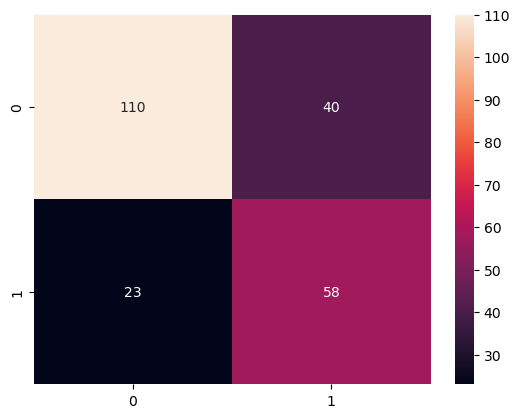

In [190]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g');

In [191]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       150
           1       0.59      0.72      0.65        81

    accuracy                           0.73       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.73      0.73       231



Roc Curve: 79.06%, discriminação excelente


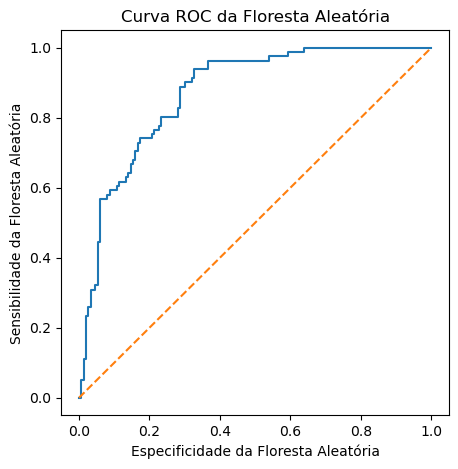

In [192]:
prob_knn_otimizado = knn_otimizado.predict_proba(x_test_imputed)[:,1]

tfp_knn_otimizado, tvp_knn_otimizado, limite_knn_otimizado = roc_curve(y_test, prob_knn_otimizado)
print('Roc Curve: {0:.2f}%, discriminação excelente'.format(roc_auc_score(y_test, prob_knn_otimizado)*100))
plt.subplots(1, figsize = (5,5))
plt.title('Curva ROC da Floresta Aleatória')
plt.plot(tfp, tvp)
plt.plot([0,1],[0,1], linestyle = '--')
plt.ylabel('Sensibilidade da Floresta Aleatória')
plt.xlabel('Especificidade da Floresta Aleatória')
plt.show()

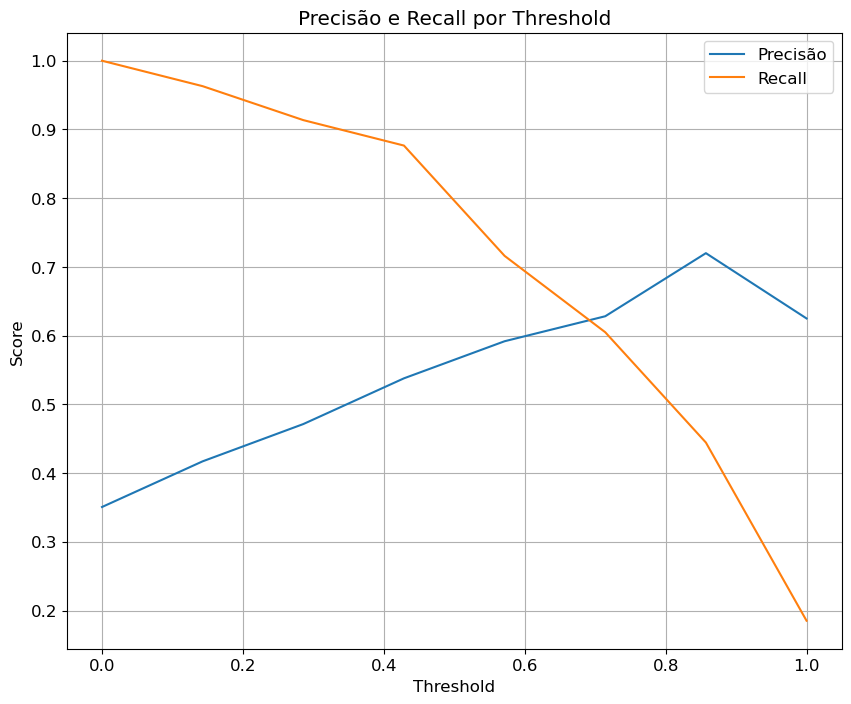

In [386]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, prob_knn_otimizado)

plt.plot(thresholds_pr, precision[:-1], label="Precisão")
plt.plot(thresholds_pr, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precisão e Recall por Threshold")
plt.legend()
plt.grid();

### Decision Tree

#### Treinamento e validação inicial

In [193]:
from sklearn.tree import DecisionTreeClassifier

In [194]:
decision_tree = DecisionTreeClassifier(max_depth = 3)
decision_tree.fit(x_train_imputed, y_train)

DecisionTreeClassifier(max_depth=3)

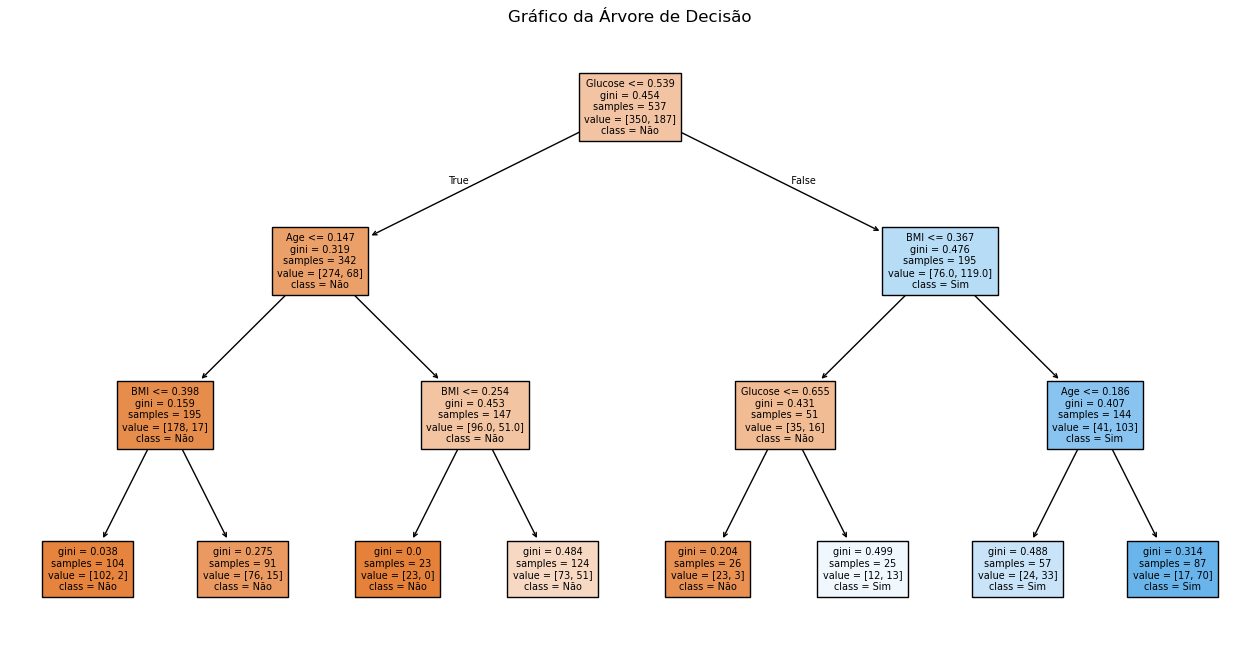

In [195]:
from sklearn.tree import plot_tree

plt.figure(figsize = (16,8))
plot_tree(decision_tree, filled = True, class_names = ['Não', 'Sim'], fontsize = 7, feature_names = dados.columns)
plt.title('Gráfico da Árvore de Decisão');

In [196]:
print('A acurácia de teste da Árvore de Decisão é {0:.2f}%'.format(decision_tree.score(x_test_imputed,y_test)*100))

A acurácia de teste da Árvore de Decisão é 78.35%


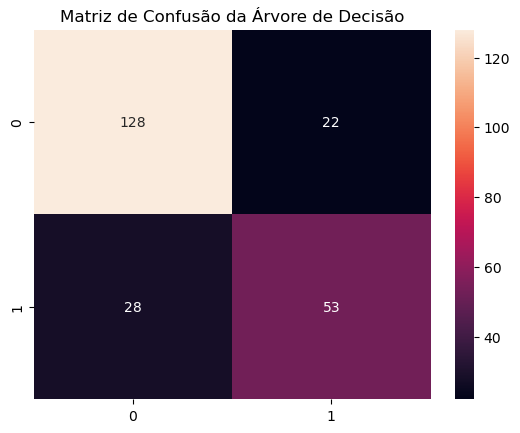

In [197]:
y_pred = decision_tree.predict(x_test_imputed)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g')
plt.title('Matriz de Confusão da Árvore de Decisão');

In [198]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       150
           1       0.71      0.65      0.68        81

    accuracy                           0.78       231
   macro avg       0.76      0.75      0.76       231
weighted avg       0.78      0.78      0.78       231



Roc Curve: 84.68%, discriminação excelente


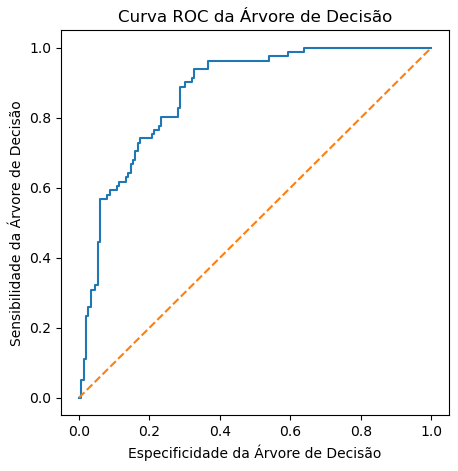

In [199]:
prob_dt = decision_tree.predict_proba(x_test_imputed)[:,1]

tfp_dt, tvp_dt, limite_dt = roc_curve(y_test, prob_dt)
print('Roc Curve: {0:.2f}%, discriminação excelente'.format(roc_auc_score(y_test, prob_dt)*100))
plt.subplots(1, figsize = (5,5))
plt.title('Curva ROC da Árvore de Decisão')
plt.plot(tfp, tvp)
plt.plot([0,1],[0,1], linestyle = '--')
plt.ylabel('Sensibilidade da Árvore de Decisão')
plt.xlabel('Especificidade da Árvore de Decisão')
plt.show()

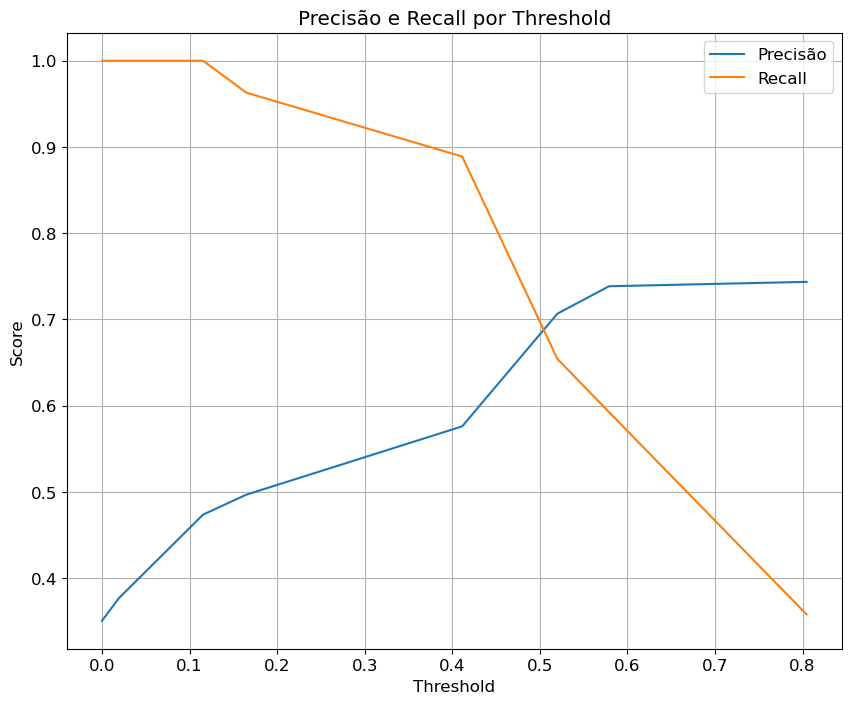

In [387]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, prob_dt)

plt.plot(thresholds_pr, precision[:-1], label="Precisão")
plt.plot(thresholds_pr, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precisão e Recall por Threshold")
plt.legend()
plt.grid();

#### Validação Cruzada

In [200]:
modelo = DecisionTreeClassifier()
pipeline = blearnpipe([
        ('oversample', SMOTE()),
        ('dtc', modelo)
    ])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 12)
cv_results = cross_validate(pipeline, x_imputed, y, cv = skf, scoring = ['accuracy', 'precision', 'f1', 'recall'])

In [201]:
metrics_report(cv_results)

Intervalo de confiança test_accuracy: [0.62303, 0.72840]
Intervalo de confiança test_precision: [0.46191, 0.60835]
Intervalo de confiança test_recall: [0.48260, 0.64416]
Intervalo de confiança test_f1: [0.48434, 0.61158]


In [202]:
modelo = DecisionTreeClassifier()
pipeline = blearnpipe([
        ('undersample', NearMiss()),
        ('dtc', modelo)
    ])
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 12)
cv_results = cross_validate(pipeline, x_imputed, y, cv = skf, scoring = ['accuracy', 'precision', 'f1', 'recall'])

In [203]:
metrics_report(cv_results)

Intervalo de confiança test_accuracy: [0.50533, 0.77312]
Intervalo de confiança test_precision: [0.33614, 0.64087]
Intervalo de confiança test_recall: [0.38963, 0.82672]
Intervalo de confiança test_f1: [0.36946, 0.70933]


#### Tuning de hiperparâmetros

In [204]:
pipe = blearnpipe([
    ('undersampling', NearMiss()),
    ('dtc', DecisionTreeClassifier())
])

In [205]:
search_space_tree = {
    'dtc__criterion': Categorical(['gini', 'entropy']),
    'dtc__max_depth': Integer(6, 12),
    'dtc__min_samples_leaf': Integer(5, 20),
    'dtc__min_samples_split': Integer(5, 20),
    'dtc__max_features': Categorical(['sqrt', 'log2']),
    'dtc__splitter': Categorical(['best', 'random'])
}

In [206]:
bayes_search_tree = BayesSearchCV(
    estimator = pipe, 
    search_spaces = search_space_tree, 
    n_iter = 50, 
    scoring = 'f1',
    refit = True,
    n_jobs = -1, 
    cv = skf
)

In [207]:
bayes_search_tree.fit(x_train_imputed, y_train)

BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12, shuffle=True),
              estimator=Pipeline(steps=[('undersampling', NearMiss()),
                                        ('dtc', DecisionTreeClassifier())]),
              n_jobs=-1, scoring='f1',
              search_spaces={'dtc__criterion': Categorical(categories=('gini', 'entropy'), prior=None),
                             'dtc__max_depth': Integer(low=6, high=12, prior='uniform', transform='normalize'),
                             'dtc__max_features': Categorical(categories=('sqrt', 'log2'), prior=None),
                             'dtc__min_samples_leaf': Integer(low=5, high=20, prior='uniform', transform='normalize'),
                             'dtc__min_samples_split': Integer(low=5, high=20, prior='uniform', transform='normalize'),
                             'dtc__splitter': Categorical(categories=('best', 'random'), prior=None)})

In [208]:
dtc_otimizado = bayes_search_tree.best_estimator_

In [209]:
dtc_otimizado.fit(x_train_imputed, y_train)

Pipeline(steps=[('undersampling', NearMiss()),
                ('dtc',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        max_features='log2',
                                        min_samples_leaf=20,
                                        min_samples_split=20))])

In [210]:
dtc_otimizado.score(x_train_imputed, y_train)

0.7243947858472998

In [211]:
dtc_otimizado.score(x_test_imputed, y_test)

0.7359307359307359

In [212]:
y_pred = dtc_otimizado.predict(x_test_imputed)

<Axes: >

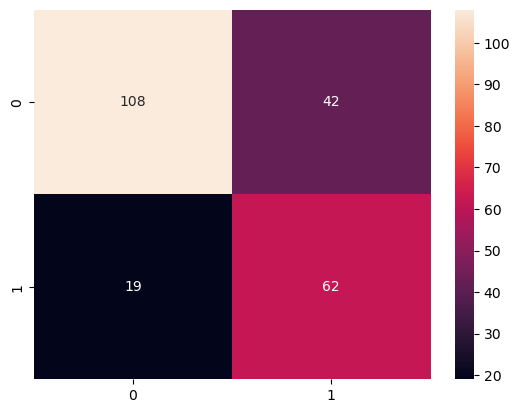

In [213]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g')

In [214]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       150
           1       0.60      0.77      0.67        81

    accuracy                           0.74       231
   macro avg       0.72      0.74      0.73       231
weighted avg       0.76      0.74      0.74       231



Roc Curve: 83.72%, discriminação excelente


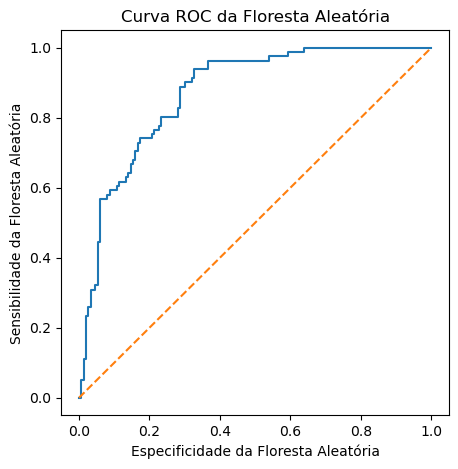

In [215]:
prob_dtc_otimizado = dtc_otimizado.predict_proba(x_test_imputed)[:,1]

tfp_dtc_otimizado, tvp_dtc_otimizado, limite_dtc_otimizado = roc_curve(y_test, prob_dtc_otimizado)
print('Roc Curve: {0:.2f}%, discriminação excelente'.format(roc_auc_score(y_test, prob_dtc_otimizado)*100))
plt.subplots(1, figsize = (5,5))
plt.title('Curva ROC da Floresta Aleatória')
plt.plot(tfp, tvp)
plt.plot([0,1],[0,1], linestyle = '--')
plt.ylabel('Sensibilidade da Floresta Aleatória')
plt.xlabel('Especificidade da Floresta Aleatória')
plt.show()

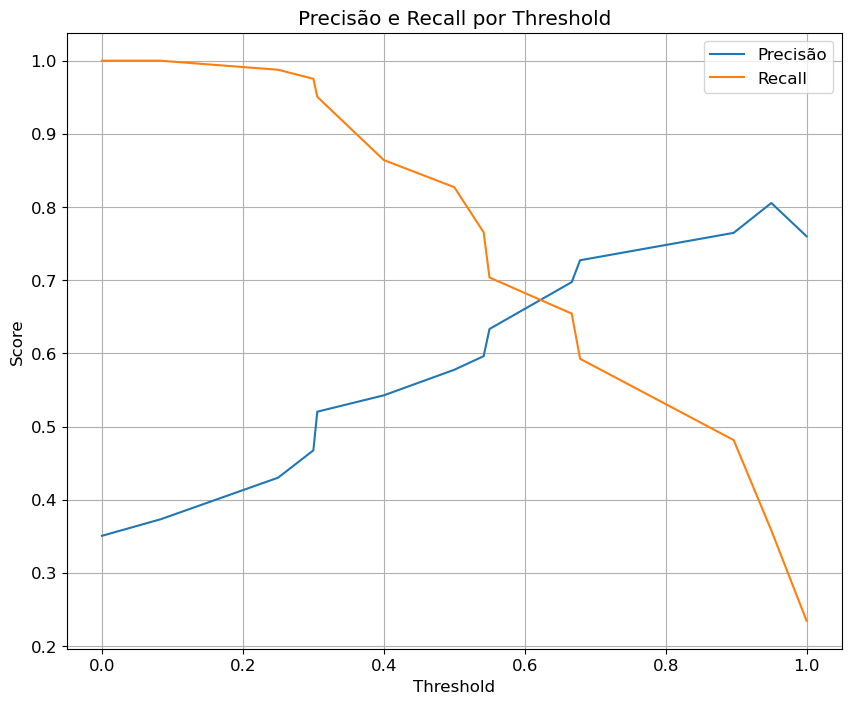

In [388]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, prob_dtc_otimizado)

plt.plot(thresholds_pr, precision[:-1], label="Precisão")
plt.plot(thresholds_pr, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precisão e Recall por Threshold")
plt.legend()
plt.grid();

### Floresta Aleatória

#### Treinamento e Avaliação Inicial

In [216]:
from sklearn.ensemble import RandomForestClassifier 

In [217]:
rfc = RandomForestClassifier()

In [219]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [220]:
rfc.score(x_train_imputed, y_train)

0.6517690875232774

In [221]:
rfc.score(x_test_imputed, y_test)

0.6493506493506493

In [222]:
y_pred = rfc.predict(x_test_imputed)

In [223]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79       150
           1       0.00      0.00      0.00        81

    accuracy                           0.65       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.42      0.65      0.51       231



<Axes: >

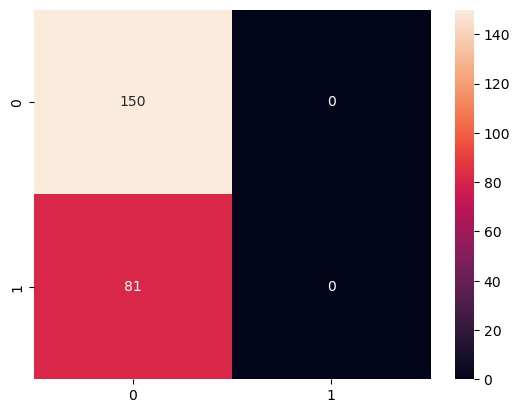

In [224]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g')

Roc Curve: 41.81%


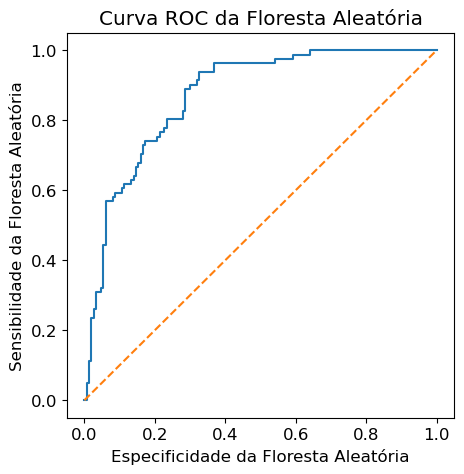

In [424]:
prob_rfc = rfc.predict_proba(x_test_imputed)[:,1]

tfp_rfc, tvp_rfc, limite_rfc = roc_curve(y_test, prob_rfc)
print('Roc Curve: {0:.2f}%'.format(roc_auc_score(y_test, prob_rfc)*100))
plt.subplots(1, figsize = (5,5))
plt.title('Curva ROC da Floresta Aleatória')
plt.plot(tfp, tvp)
plt.plot([0,1],[0,1], linestyle = '--')
plt.ylabel('Sensibilidade da Floresta Aleatória')
plt.xlabel('Especificidade da Floresta Aleatória')
plt.show()

#### Validação Cruzada

In [226]:
modelo = RandomForestClassifier()
pipeline = blearnpipe([
        ('oversample', SMOTE()),
        ('dtc', modelo)
    ])
cv_results = cross_validate(pipeline, x_imputed, y, cv = skf, scoring = ['accuracy', 'precision', 'f1', 'recall'])

In [227]:
metrics_report(cv_results)

Intervalo de confiança test_accuracy: [0.70656, 0.78556]
Intervalo de confiança test_precision: [0.57095, 0.68686]
Intervalo de confiança test_recall: [0.55787, 0.77812]
Intervalo de confiança test_f1: [0.58067, 0.71247]


In [228]:
modelo = RandomForestClassifier()
pipeline = blearnpipe([
        ('undersample', NearMiss(version = 3)),
        ('dtc', modelo)
    ])
cv_results = cross_validate(pipeline, x_imputed, y, cv = skf, scoring = ['accuracy', 'precision', 'f1', 'recall'])

In [229]:
metrics_report(cv_results)

Intervalo de confiança test_accuracy: [0.65907, 0.82261]
Intervalo de confiança test_precision: [0.50893, 0.75153]
Intervalo de confiança test_recall: [0.48303, 0.77077]
Intervalo de confiança test_f1: [0.50353, 0.75096]


#### Tuning de Hiperparâmetros

In [230]:
modelo = RandomForestClassifier()
pipe = blearnpipe([
        ('undersampling', NearMiss(version = 3)),
        ('rfc', modelo)
    ])

In [231]:
search_space_rfc = {
    'rfc__n_estimators': Integer(100, 300),
    'rfc__max_depth': Integer(3, 15),
    'rfc__min_samples_split': Integer(5, 20),
    'rfc__min_samples_leaf': Integer(2, 10),
    'rfc__max_features': Categorical(['sqrt', 'log2']),
    'rfc__bootstrap': Categorical([True]),
    'rfc__criterion': Categorical(['gini', 'entropy']),
    'rfc__class_weight': Categorical(['balanced'])
}

In [234]:
bayes_search_rfc = BayesSearchCV(
    pipe,
    search_spaces = search_space_rfc,
    scoring = 'f1',
    cv = skf,
    n_iter = 50,
    random_state = 42,
    n_jobs = -1
)

In [235]:
bayes_search_rfc.fit(x_train_imputed, y_train)

BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12, shuffle=True),
              estimator=Pipeline(steps=[('undersampling', NearMiss(version=3)),
                                        ('rfc', RandomForestClassifier())]),
              n_jobs=-1, random_state=42, scoring='f1',
              search_spaces={'rfc__bootstrap': Categorical(categories=(True,), prior=None),
                             'rfc__class_weight': Categorical(categories=('balanced',), prior=...
                             'rfc__max_depth': Integer(low=3, high=15, prior='uniform', transform='normalize'),
                             'rfc__max_features': Categorical(categories=('sqrt', 'log2'), prior=None),
                             'rfc__min_samples_leaf': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'rfc__min_samples_split': Integer(low=5, high=20, prior='uniform', transform='normalize'),
                             'rfc__n_estimators': Integer(low=100, high=300, prior='uniform', transform='normalize')})

In [236]:
rfc_otimizada = bayes_search_rfc.best_estimator_

In [237]:
rfc_otimizada.fit(x_train_imputed, y_train)

Pipeline(steps=[('undersampling', NearMiss(version=3)),
                ('rfc',
                 RandomForestClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=3,
                                        min_samples_leaf=6,
                                        min_samples_split=19,
                                        n_estimators=193))])

In [238]:
rfc_otimizada.score(x_train_imputed, y_train)

0.8156424581005587

In [239]:
rfc_otimizada.score(x_test_imputed, y_test)

0.8095238095238095

In [390]:
y_proba = rfc_otimizada.predict_proba(x_test_imputed)[:,1]

In [391]:
y_pred = rfc_otimizada.predict(x_test_imputed)

In [392]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       150
           1       0.73      0.73      0.73        81

    accuracy                           0.81       231
   macro avg       0.79      0.79      0.79       231
weighted avg       0.81      0.81      0.81       231



<Axes: >

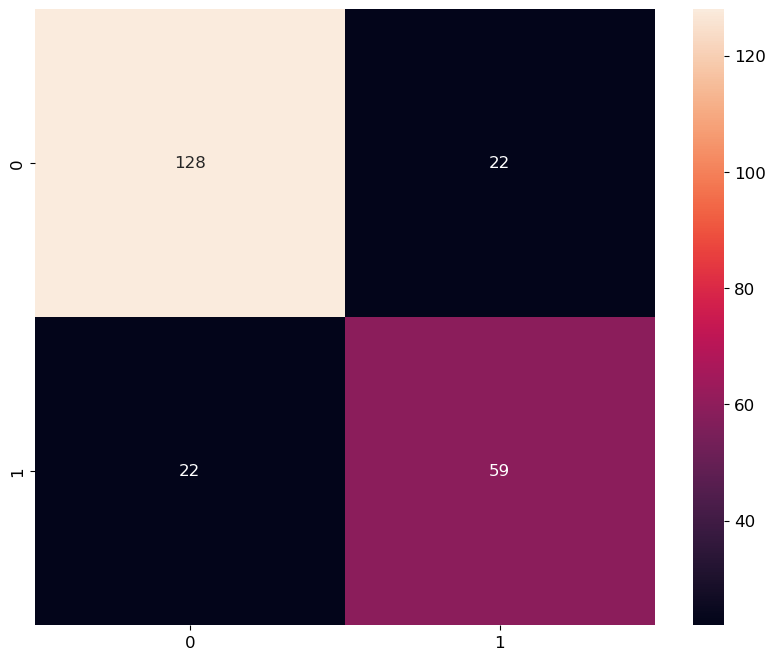

In [394]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g')

Roc Curve: 87.82%, discriminação excelente


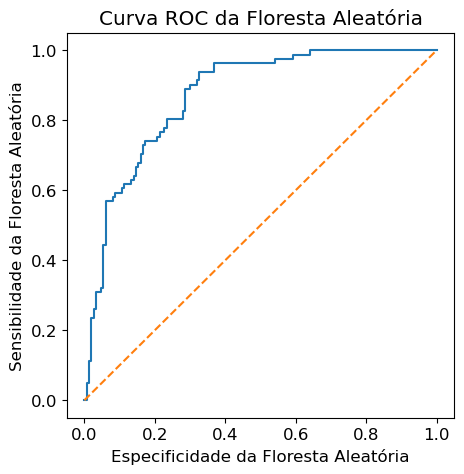

In [395]:
prob_rfc_otimizada = rfc_otimizada.predict_proba(x_test_imputed)[:,1]

tfp_rfc_otimizada, tvp_rfc_otimizada, limite_rfc_otimizada = roc_curve(y_test, prob_rfc_otimizada)
print('Roc Curve: {0:.2f}%, discriminação excelente'.format(roc_auc_score(y_test, prob_rfc_otimizada)*100))
plt.subplots(1, figsize = (5,5))
plt.title('Curva ROC da Floresta Aleatória')
plt.plot(tfp, tvp)
plt.plot([0,1],[0,1], linestyle = '--')
plt.ylabel('Sensibilidade da Floresta Aleatória')
plt.xlabel('Especificidade da Floresta Aleatória')
plt.show()

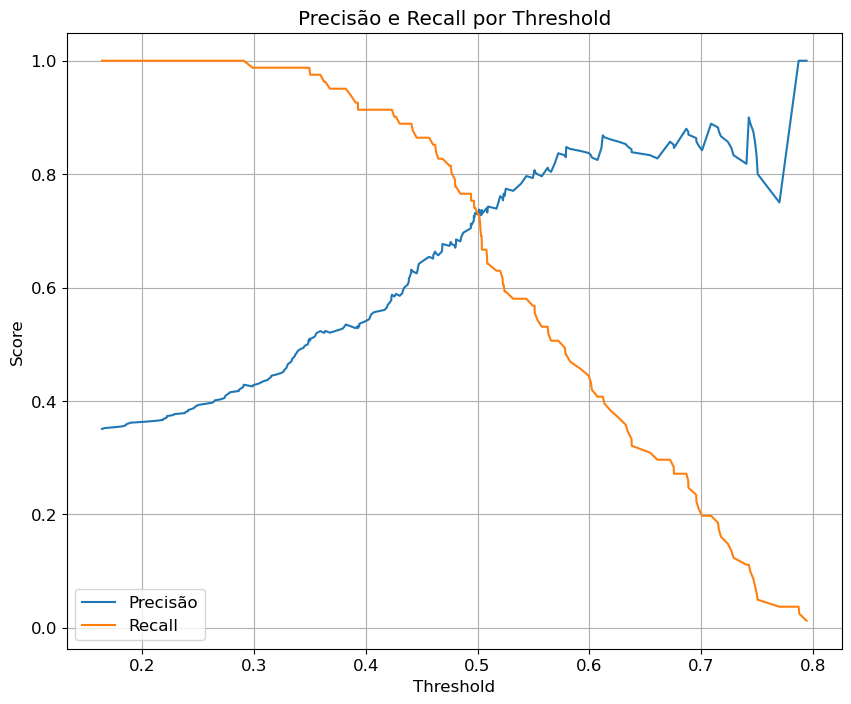

In [389]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, prob_rfc_otimizada)

plt.plot(thresholds_pr, precision[:-1], label="Precisão")
plt.plot(thresholds_pr, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precisão e Recall por Threshold")
plt.legend()
plt.grid();

In [404]:
y_pred_threshold = (y_proba >= 0.44).astype(int)
print('Classification Report:\n', classification_report(y_test, y_pred_threshold))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80       150
           1       0.63      0.89      0.73        81

    accuracy                           0.77       231
   macro avg       0.77      0.80      0.77       231
weighted avg       0.82      0.77      0.78       231



<Axes: >

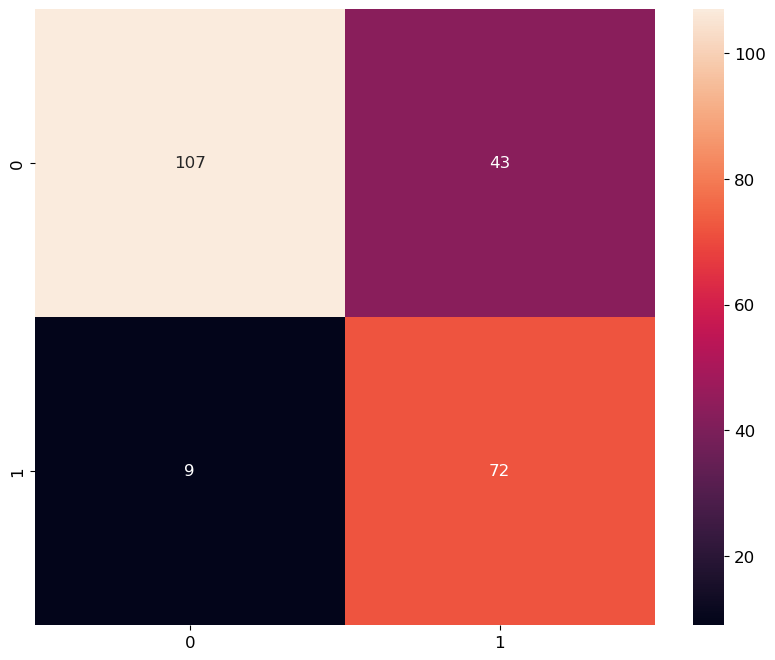

In [405]:
cm = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(cm, annot = True, fmt = 'g')

### Voting

#### Hard

In [448]:
param_grid_voting = {
    'voting': ['hard', 'soft'],
    'weights': [(1, 1), (2, 1), (1, 2)]
}

In [449]:
from sklearn.model_selection import GridSearchCV

In [450]:
grid_serch = GridSearchCV(
    voting,
    param_grid_voting,
    n_jobs = -1
)

In [451]:
grid_serch.fit(x_train_imputed, y_train)

GridSearchCV(estimator=VotingClassifier(estimators=[('Logística',
                                                     Pipeline(steps=[('oversample',
                                                                      SMOTE()),
                                                                     ('clf',
                                                                      LogisticRegression(max_iter=300,
                                                                                         random_state=42))])),
                                                    ('Floresta',
                                                     Pipeline(steps=[('oversample',
                                                                      SMOTE()),
                                                                     ('clf',
                                                                      LogisticRegression(max_iter=300,
                                                                                         random_state=42))]))],
                                        voting='soft'),
             n_jobs=-1,
             param_grid={'voting': ['hard', 'soft'],
                         'weights': [(1, 1), (2, 1), (1, 2)]})

In [452]:
grid_serch.best_params_

{'voting': 'hard', 'weights': (1, 1)}

In [453]:
grid_serch.score(x_train_imputed, y_train)

0.7411545623836127

In [454]:
grid_serch.score(x_test_imputed, y_test)

0.7792207792207793

In [455]:
y_pred = grid_serch.predict(x_test_imputed)

In [456]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       150
           1       0.66      0.77      0.71        81

    accuracy                           0.78       231
   macro avg       0.76      0.78      0.77       231
weighted avg       0.79      0.78      0.78       231



<Axes: >

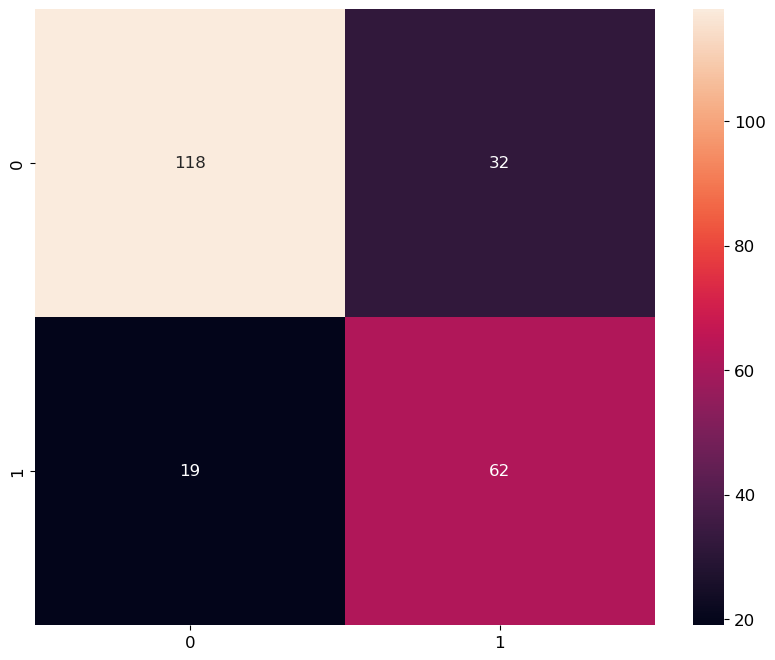

In [457]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g')

#### Soft

In [246]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier

In [429]:
pipelines = []
nome_modelos = ['Logística', 'Floresta']

In [430]:
for modelo, nome in zip([lr_otimizada, rfc_otimizada], nome_modelos):
    
    validacao = cross_validate(modelo, x_train_imputed, y_train, cv = skf)
    pipelines.append(pipe)

    print(f"{nome}: {validacao['test_score'].mean():.4f}")

Logística: 0.7320
Floresta: 0.7357


In [431]:
voting = VotingClassifier(
    estimators = [
        (nome_modelos[0], pipelines[0]),
        (nome_modelos[1], pipelines[1])
    ],
    voting = 'soft'
)

In [432]:
voting.fit(x_train_imputed, y_train)

VotingClassifier(estimators=[('Logística',
                              Pipeline(steps=[('oversample', SMOTE()),
                                              ('clf',
                                               LogisticRegression(max_iter=300,
                                                                  random_state=42))])),
                             ('Floresta',
                              Pipeline(steps=[('oversample', SMOTE()),
                                              ('clf',
                                               LogisticRegression(max_iter=300,
                                                                  random_state=42))]))],
                 voting='soft')

In [433]:
y_proba_voting = voting.predict_proba(x_test_imputed)[:,1]

In [434]:
y_pred = voting.predict(x_test_imputed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       150
           1       0.65      0.77      0.70        81

    accuracy                           0.77       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.79      0.77      0.78       231



<Axes: >

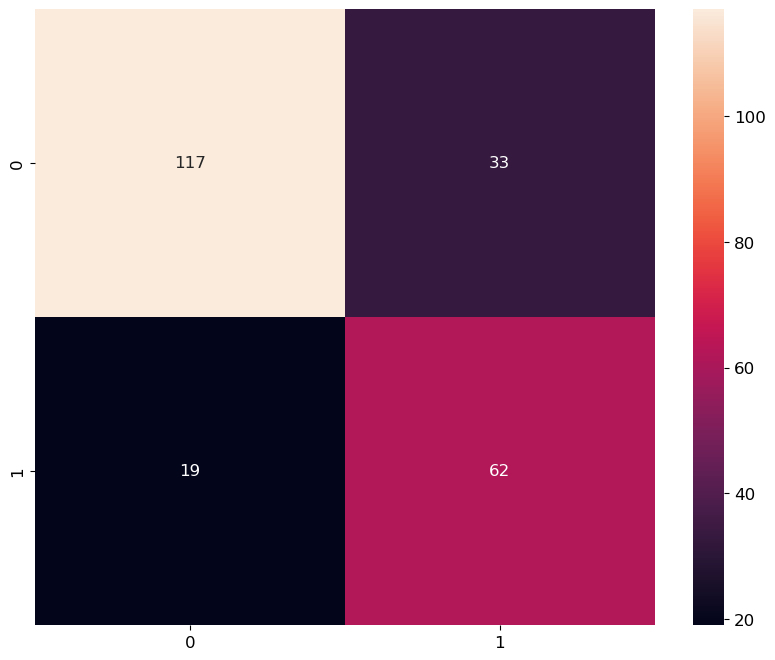

In [435]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g')

Roc Curve: 87.13%, discriminação excelente


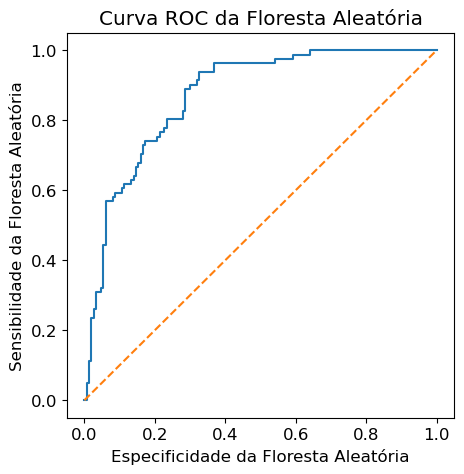

In [436]:
prob_voting = voting.predict_proba(x_test_imputed)[:,1]

tfp_rfc_otimizada, tvp_rfc_otimizada, limite_rfc_otimizada = roc_curve(y_test, prob_voting)
print('Roc Curve: {0:.2f}%, discriminação excelente'.format(roc_auc_score(y_test, prob_voting)*100))
plt.subplots(1, figsize = (5,5))
plt.title('Curva ROC da Floresta Aleatória')
plt.plot(tfp, tvp)
plt.plot([0,1],[0,1], linestyle = '--')
plt.ylabel('Sensibilidade da Floresta Aleatória')
plt.xlabel('Especificidade da Floresta Aleatória')
plt.show()

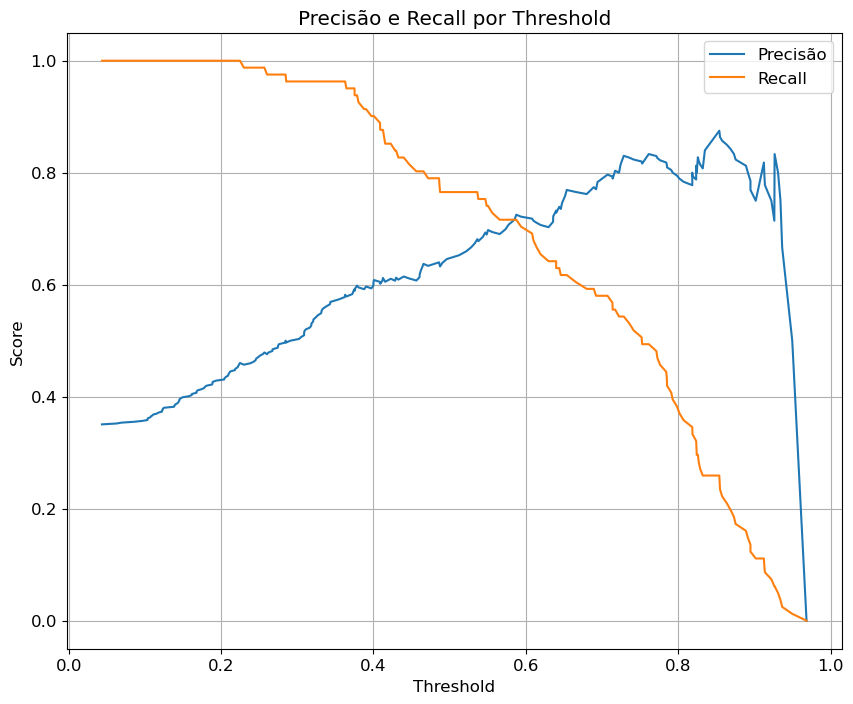

In [437]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, prob_voting)

plt.plot(thresholds_pr, precision[:-1], label="Precisão")
plt.plot(thresholds_pr, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precisão e Recall por Threshold")
plt.legend()
plt.grid();

In [444]:
y_pred_threshold = (y_proba >= 0.42).astype(int)
print('Classification Report:\n', classification_report(y_test, y_pred_threshold))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.63      0.75       150
           1       0.57      0.91      0.70        81

    accuracy                           0.73       231
   macro avg       0.75      0.77      0.73       231
weighted avg       0.81      0.73      0.74       231



<Axes: >

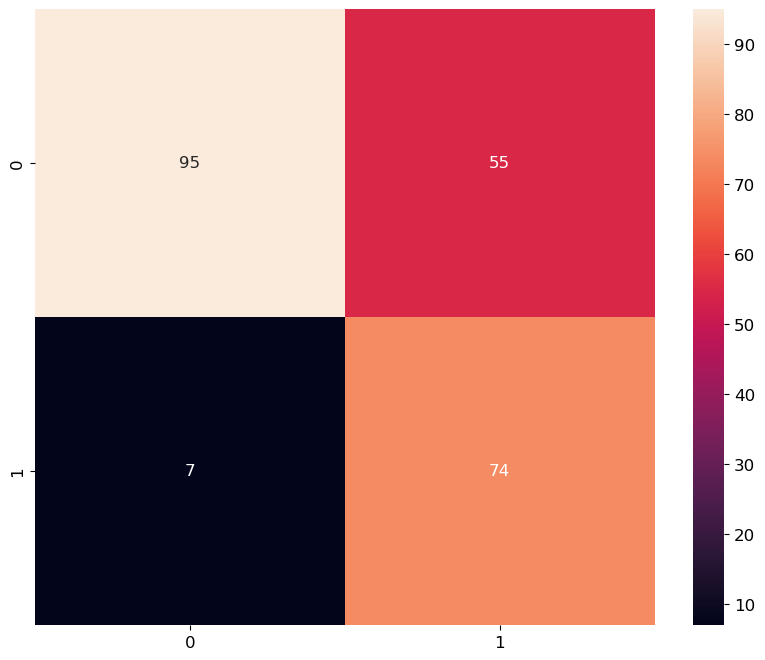

In [445]:
cm = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(cm, annot = True, fmt = 'g')

In [291]:
from sklearn.ensemble import BaggingClassifier

In [292]:
bagging = BaggingClassifier(
    n_estimators = 32,
    random_state = 42
)

In [293]:
bagging.fit(x_train_imputed, y_train)

BaggingClassifier(n_estimators=32, random_state=42)

In [294]:
y_pred = bagging.predict(x_test_imputed)

<Axes: >

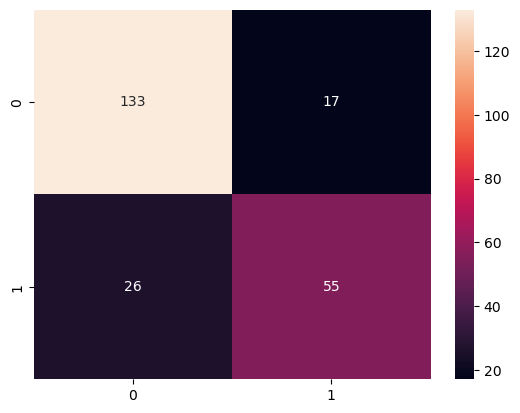

In [295]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g')

In [296]:
search_space_bagging = {
    'n_estimators': Integer(10, 200),
    'max_samples': Real(0.5, 0.9),
    'max_features': Real(0.5, 0.9)
}

In [297]:
bayes_bagging = BayesSearchCV(
    BaggingClassifier(),
    search_space_bagging,
    cv = 5,
    n_jobs = -1
)

In [298]:
bayes_bagging.fit(x_train_imputed, y_train)

BayesSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
              search_spaces={'max_features': Real(low=0.5, high=0.9, prior='uniform', transform='normalize'),
                             'max_samples': Real(low=0.5, high=0.9, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=200, prior='uniform', transform='normalize')})

#### AdaBoost

In [299]:
from sklearn.ensemble import AdaBoostClassifier

In [300]:
adaboost = AdaBoostClassifier(
    n_estimators = 50,
    learning_rate = 1
)

In [301]:
adaboost.fit(x_train_imputed, y_train)

AdaBoostClassifier(learning_rate=1)

In [302]:
y_pred = adaboost.predict(x_test_imputed)

In [303]:
adaboost.score(x_train_imputed, y_train)

0.8249534450651769

In [304]:
adaboost.score(x_test_imputed, y_test)

0.7532467532467533

In [305]:
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [306]:
grid_adaboost = GridSearchCV(
    AdaBoostClassifier(),
    param_grid_adaboost,
    cv = 5,
    scoring = 'recall',
    n_jobs = -1
)

In [307]:
grid_adaboost.fit(x_train_imputed, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [50, 100, 200]},
             scoring='recall')

In [345]:
y_pred = grid_adaboost.predict(x_test_imputed)

In [309]:
grid_adaboost.score(x_train_imputed, y_train)

0.6363636363636364

In [310]:
grid_adaboost.score(x_test_imputed, y_test)

0.691358024691358

In [346]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80       150
           1       0.63      0.69      0.66        81

    accuracy                           0.75       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.75      0.75       231



<Axes: >

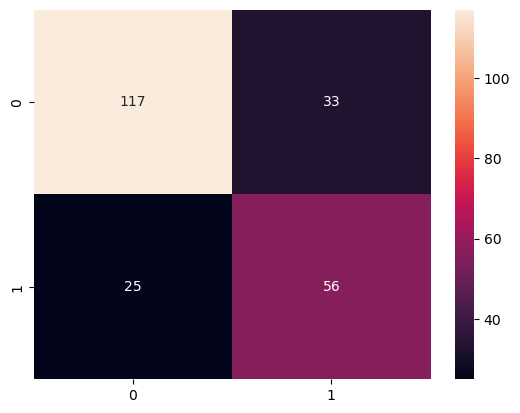

In [311]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g')

Roc Curve: 73.57%, discriminação excelente


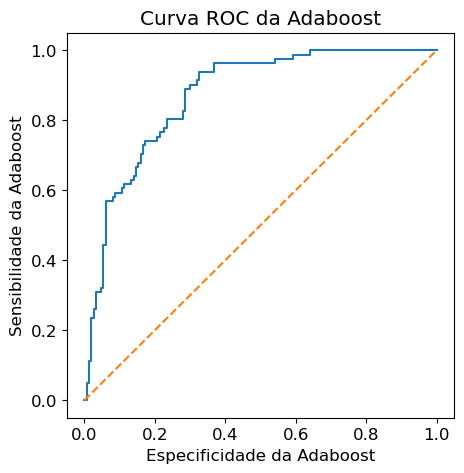

In [350]:
prob_ada_otimizada = grid_adaboost.predict_proba(x_test_imputed)[:,1]

tfp_ada_otimizada, tvp_ada_otimizada, limite_ada_otimizada = roc_curve(y_test, prob_ada_otimizada)
print('Roc Curve: {0:.2f}%, discriminação excelente'.format(roc_auc_score(y_test, prob_ada_otimizada)*100))
plt.subplots(1, figsize = (5,5))
plt.title('Curva ROC da Adaboost')
plt.plot(tfp, tvp)
plt.plot([0,1],[0,1], linestyle = '--')
plt.ylabel('Sensibilidade da Adaboost')
plt.xlabel('Especificidade da Adaboost')
plt.show()

### Stacking

In [261]:
from sklearn.ensemble import StackingClassifier

In [499]:
modelo_meta = LogisticRegression()

In [500]:
estimators = [
    ('lr', bayes_lr.best_estimator_),
    ('rfc', bayes_search_rfc.best_estimator_)
]

In [501]:
stacking = StackingClassifier(
    estimators = estimators,
    final_estimator = modelo_meta,
    n_jobs = -1
)

In [502]:
stacking.fit(x_train_imputed, y_train)

StackingClassifier(estimators=[('lr',
                                Pipeline(steps=[('oversample', SMOTE()),
                                                ('clf',
                                                 LogisticRegression(C=0.22734440463497477,
                                                                    max_iter=300,
                                                                    penalty='l1',
                                                                    random_state=42,
                                                                    solver='liblinear'))])),
                               ('rfc',
                                Pipeline(steps=[('undersampling',
                                                 NearMiss(version=3)),
                                                ('rfc',
                                                 RandomForestClassifier(class_weight='balanced',
                                                                        criterion='entropy',
                                                                        max_depth=3,
                                                                        min_samples_leaf=6,
                                                                        min_samples_split=19,
                                                                        n_estimators=193))]))],
                   final_estimator=LogisticRegression(), n_jobs=-1)

In [503]:
y_pred = stacking.predict(x_test_imputed)

In [504]:
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       150
           1       0.76      0.62      0.68        81

    accuracy                           0.80       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



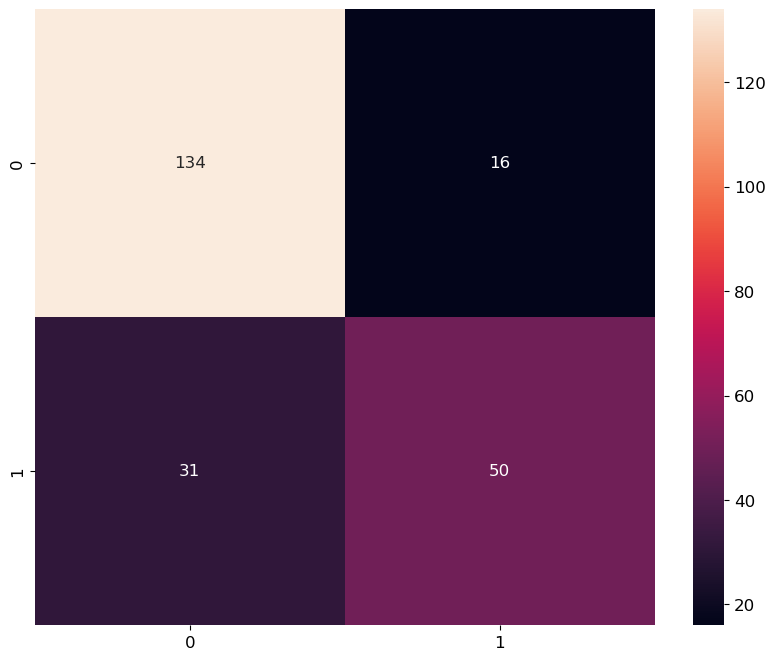

In [506]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = 'g');

In [507]:
y_proba_stacking = stacking.predict_proba(x_test_imputed)[:,1]

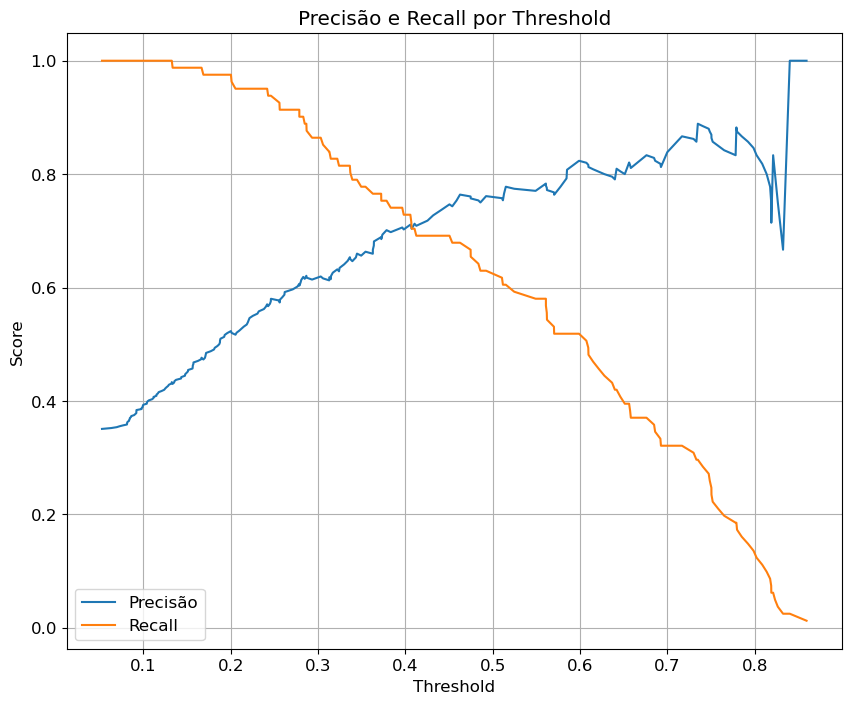

In [508]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_proba_stacking)

plt.plot(thresholds_pr, precision[:-1], label="Precisão")
plt.plot(thresholds_pr, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precisão e Recall por Threshold")
plt.legend()
plt.grid();

In [511]:
y_pred_threshold = (y_proba >= 0.28).astype(int)
print('Classification Report:\n', classification_report(y_test, y_pred_threshold))

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.69      0.79       150
           1       0.61      0.90      0.73        81

    accuracy                           0.76       231
   macro avg       0.77      0.79      0.76       231
weighted avg       0.82      0.76      0.77       231



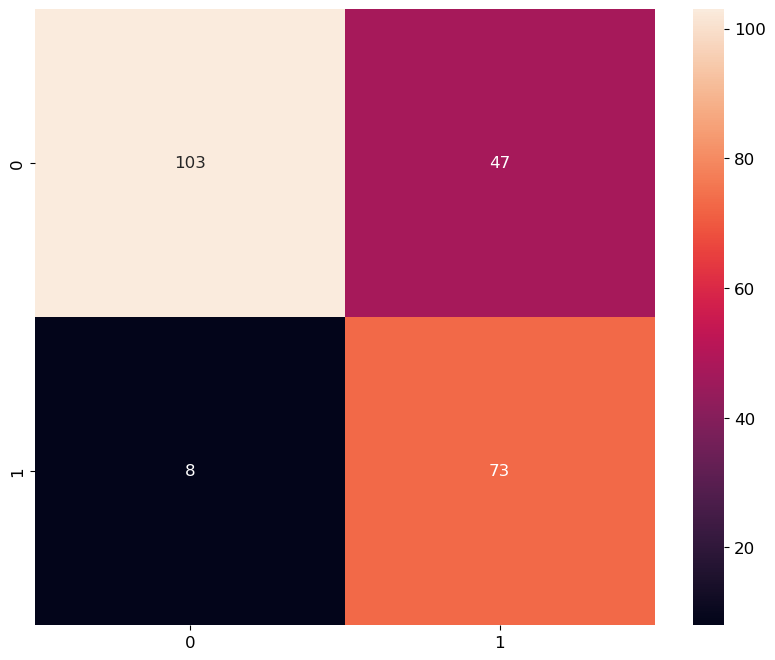

In [512]:
cm = confusion_matrix(y_test, y_pred_threshold)
sns.heatmap(cm, annot = True, fmt = 'g');

# Conclusões

## ✅ Conclusão Final: Avaliação dos Modelos com Thresholds Otimizados

Após o ajuste dos thresholds específicos para cada modelo, foi realizada uma comparação final levando em conta as métricas mais relevantes para o problema de previsão de diabetes.

### 📊 Tabela de Métricas com Thresholds Ajustados

As métricas abaixo são referentes à classe positiva (presença de diabetes):


In [516]:
import pandas as pd

df_threshold_metrics = pd.DataFrame({
    "Modelo": ["Regressão Logística", "Random Forest", "Voting", "Stacking"],
    "Threshold": [0.42, 0.44, 0.42, 0.28],
    "Acurácia": [0.74, 0.77, 0.73, 0.76],
    "Precision (1)": [0.57, 0.63, 0.57, 0.61],
    "Recall (1)": [0.94, 0.89, 0.91, 0.90],
    "F1-Score (1)": [0.72, 0.73, 0.70, 0.73],
    "AUC": [86.58, 87.82, 87.13, 87.00]
})


df_threshold_metrics.style.set_caption("📊 Métricas com Thresholds Ajustados").format(precision=2)

,Modelo,Threshold,Acurácia,Precision (1),Recall (1),F1-Score (1),AUC
0,Regressão Logística,0.42,0.74,0.57,0.94,0.72,86.58
1,Random Forest,0.44,0.77,0.63,0.89,0.73,87.82
2,Voting,0.42,0.73,0.57,0.91,0.70,87.13
3,Stacking,0.28,0.76,0.61,0.90,0.73,87.00


In [514]:
from statsmodels.stats.contingency_tables import mcnemar

y_proba_rf = rfc_otimizada.predict_proba(x_test_imputed)[:, 1]
y_pred_rf_thresh = (y_proba_rf >= 0.44).astype(int)

y_proba_stacking = stacking.predict_proba(x_test_imputed)[:, 1]
y_pred_stacking_thresh = (y_proba_stacking >= 0.28).astype(int)

contingency = [
    [sum((y_pred_rf_thresh == y_test) & (y_pred_stacking_thresh == y_test)), 
     sum((y_pred_rf_thresh != y_test) & (y_pred_stacking_thresh == y_test))],
    [sum((y_pred_rf_thresh == y_test) & (y_pred_stacking_thresh != y_test)), 
     sum((y_pred_rf_thresh != y_test) & (y_pred_stacking_thresh != y_test))]
]

result = mcnemar(contingency, exact=False)
print(f'Estatística: {result.statistic:.4f}, p-valor: {result.pvalue:.4f}')

if result.pvalue < 0.05:
    print("Diferença estatisticamente significativa entre os modelos.")
else:
    print("Não há diferença estatisticamente significativa entre os modelos.")

Estatística: 0.0455, p-valor: 0.8312
Não há diferença estatisticamente significativa entre os modelos.


### Reflexão Final

- **Random Forest otimizada com threshold ajustado (0.44)** demonstrou melhor equilíbrio entre **precisão (0.63)**, **recall (0.89)**, **F1 (0.73)** e **AUC (87.82%)**.
- É o modelo mais robusto e generalizável, adequado para uso real, inclusive em ambientes clínicos moderadamente sensíveis.
- Contudo, em **contextos onde falsos negativos são mais graves que falsos positivos**, como triagens clínicas iniciais, a **Regressão Logística com threshold 0.42** é preferível por apresentar **recall de 94%**.

Ambos os modelos passaram pelo processo completo de validação cruzada e otimização, garantindo respaldo interpretativo e técnico.
